In [482]:
from pynwb import NWBHDF5IO
#from nwbwidgets import nwb2widget
import h5py, glob, os
import numpy as np
import matplotlib.pyplot as plt
from dlab import sglx_analysis as sglx
from dlab import psth_and_raster as pr
import numpy as np
import pandas as pd
import os
from tqdm.notebook import tqdm as tqdm
import glob
import pickle as pkl
import json
import datetime as dt
import h5py
from dlab import sglx_analysis as sglx
import math
# import jlh_ephys_tools as jlh
import matplotlib.pyplot as plt
# from open_ephys.analysis import Session
import seaborn as sns
import dlab.psth_and_raster as psth
from dlab.generalephys import cleanAxes
import matplotlib.lines as mlines

import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
from scipy.ndimage import gaussian_filter1d
from scipy.stats import gaussian_kde



# Back up function

In [483]:
def allUnits_rasters_flash(self,probeLetter,path,Savefig=False,):
        df_stim = self.trials()
        df_units = self.units() 

     
        df1 = df_units[df_units.probe==probeLetter][df_units.label==2]
        unit_index = df1.index.tolist()

        # unit = unit_index[unit_indexNumber]
        for unit in unit_index:

            f,ax=plt.subplots(1,1)
            f.suptitle(f"probe {probeLetter} unit {unit} flash epoch" , color='black')
            
                # Set the background color and text color for this subplot
            ax.set_facecolor('black')
            ax.tick_params(color='black', labelcolor='black')
            for spine in ax.spines.values():
                spine.set_edgecolor('black')
            
            
            psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
                    triggers=df_stim[(df_stim.stimulus=='luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values,
                        ymax=60,binsize=0.05,axes=ax,color='#487697')
            psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
                    triggers=df_stim[(df_stim.stimulus=='luminance_flash_opto') ].start_time.values,
                        ymax=60,binsize=0.05,axes=ax,color='#ffaa00')
            plt.tight_layout()
            # if Savefig == True:
            #     f.savefig(path+f'{unit}')
            #     f.savefig(path+f'{unit}')
            # else:
            #     pass

            f,ax=plt.subplots(2,1)
                # Set the background color and text color for these subplots
            f.suptitle(f"probe {probeLetter} unit {unit} flash epoch" , color='black')
            for ax_ in ax:
                ax_.set_facecolor('black')
                ax_.tick_params(color='black', labelcolor='black')
                for spine in ax_.spines.values():
                    spine.set_edgecolor('black')
            
            psth.raster(times=df1[df1.index==unit].spike_times.values[0],
                    triggers=df_stim[(df_stim.stimulus=='luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values,
                        axes=ax[0],color='#487697',timeDomain=True,post=1.5,ms=8)
            psth.raster(times=df1[df1.index==unit].spike_times.values[0],
                    triggers=df_stim[(df_stim.stimulus=='luminance_flash_opto') ].start_time.values,
                        axes=ax[1],color='#ffaa00',timeDomain=True,post=1.5,ms=8)
            for ax_ in ax: ax_.set_xlim(-0.5,1.0)
            
            if Savefig == True:
                f.savefig(path+f'{unit}')
                f.savefig(path+f'{unit}')
            else:
                pass
            # if Savefig == True:
            #     plt.tight_layout()
            #     f.savefig(path+f'{unit}')
            # else:
            #     pass

def allUnit_scenes(self, probeLetter, brain_region ,path ,Savefig=False):
    df_stim = self.trials()
    df_units = self.units()

    df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
    unit_index = df1.index.tolist()

    for unit in unit_index:
        # Create a single figure with 3 subplots
        # f, ax = plt.subplots(3, 1)
        f, ax = plt.subplots(3, 1, figsize=(10, 15))

        f.suptitle(f"aligned grating events; unit {unit}, probe {probeLetter} in {brain_region}", color='black')

        # Plot the psth_line in the first subplot
        ax[0].set_facecolor('black')
        ax[0].tick_params(color='black', labelcolor='black')
        for spine in ax[0].spines.values():
            spine.set_edgecolor('black')
        psth.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                    triggers=df_stim[(df_stim.stimulus == 'scenes') & (df_stim.optogenetics_LED_state == 0)].start_time.values,
                    ymax=60, binsize=0.05, axes=ax[0], color='#ffaa00')
        
        psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
                    triggers=df_stim[(df_stim.stimulus=='scenes_opto') ].start_time.values,
                    ymax=60,binsize=0.05,axes=ax[0],color='#487697')
        ax[0].set_xlim(-0.5, 1.0)
        
        # Create custom legend handles
        handle1 = mlines.Line2D([], [], color='#ffaa00', label='Non-Opto')
        handle2 = mlines.Line2D([], [], color='#487697', label='Opto')

        # Add legend to the first subplot
        ax[0].legend(handles=[handle1, handle2], loc='upper right')


        # Plot the rasters in the second and third subplots
        for i, ax_ in enumerate(ax[1:]):
            ax_.set_facecolor('black')
            ax_.tick_params(color='black', labelcolor='black')
            for spine in ax_.spines.values():
                spine.set_edgecolor('black')

        psth.raster(times=df1[df1.index == unit].spike_times.values[0],
                    triggers=df_stim[(df_stim.stimulus == 'scenes') & (df_stim.optogenetics_LED_state == 0)].start_time.values,
                    axes=ax[1], color='#ffaa00', timeDomain=True, post=1.5, ms=8)

        psth.raster(times=df1[df1.index == unit].spike_times.values[0],
                    triggers=df_stim[(df_stim.stimulus == 'scenes_opto')].start_time.values,
                    axes=ax[2], color='#487697', timeDomain=True, post=1.5, ms=8)
        ax[1].set_xlim(-0.5, 1.0)
        ax[2].set_xlim(-0.5, 1.0)
        ax[1].set_title('non-optp', color='black')
        ax[2].set_title('opto', color='black')


        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the suptitle

        if Savefig:
            f.savefig(f"{path}{unit}.png")
    
        plt.close(f)  # Close the figure to free up memory
        # Uncomment the next line to stop the loop after one iteration
        

def allUnit_scenes_conjoined(self, probeLetter, brain_region, path, Savefig=False):
    df_stim = self.trials()
    df_units = self.units()

    df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
    unit_index = df1.index.tolist()

    # Filter df_stim to only include rows where stimulus is 'scenes' or 'scenes_opto'
    df_stim_filtered = df_stim[df_stim['stimulus'].isin(['scenes', 'scenes_opto'])]
    unique_stimulus_indices = df_stim_filtered['stimulus_index'].unique()

    for unit in unit_index:
        f, ax = plt.subplots(4, 5, figsize=(20, 16))  # 4x5 grid for 20 subplots
        f.suptitle(f"aligned scene events; unit {unit}, probe {probeLetter} in {brain_region}", fontsize=16, color='black')

        ax = ax.flatten()  # Flatten the array for easy indexing

        for i, stim_index in enumerate(unique_stimulus_indices):
            # Set the background color and text color for this subplot
            ax[i].set_facecolor('black')
            ax[i].tick_params(color='black', labelcolor='black')
            for spine in ax[i].spines.values():
                spine.set_edgecolor('black')

            # Filter triggers by stimulus_index
            triggers_non_opto = df_stim_filtered[(df_stim_filtered.stimulus == 'scenes') & (df_stim_filtered.optogenetics_LED_state == 0) & (df_stim_filtered.stimulus_index == stim_index)].start_time.values
            triggers_opto = df_stim_filtered[(df_stim_filtered.stimulus == 'scenes_opto') & (df_stim_filtered.stimulus_index == stim_index)].start_time.values

            psth.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                        triggers=triggers_non_opto,
                        ymax=60, binsize=0.05, axes=ax[i], color='#ffaa00')

            psth.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                        triggers=triggers_opto,
                        ymax=60, binsize=0.05, axes=ax[i], color='#487697')

            ax[i].set_title(f"Index {stim_index}", color='black')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the suptitle

        if Savefig:
            f.savefig(f"{path}{unit}_all_indices.png")

        plt.close(f)  # Close the figure to free up memory

def allUnit_scenes_conjoined(self, probeLetter, brain_region, path, Savefig=False):
    df_stim = self.trials()
    df_units = self.units()

    df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
    unit_index = df1.index.tolist()

    df_stim_filtered = df_stim[df_stim['stimulus'].isin(['scenes', 'scenes_opto'])]
    unique_stimulus_indices = df_stim_filtered['stimulus_index'].unique()

    for unit in unit_index:
        # First figure for psth_line plots
        f1, ax1 = plt.subplots(4, 5, figsize=(20, 16))
        f1.suptitle(f"aligned scene events (PSTH); unit {unit}, probe {probeLetter} in {brain_region}", fontsize=16, color='black')

        # Second figure for raster plots
        f2, ax2 = plt.subplots(4, 5, figsize=(20, 16))
        f2.suptitle(f"aligned scene events (Raster); unit {unit}, probe {probeLetter} in {brain_region}", fontsize=16, color='black')

        ax1 = ax1.flatten()
        ax2 = ax2.flatten()

        for i, stim_index in enumerate(unique_stimulus_indices):
            for ax in [ax1[i], ax2[i]]:
                ax.set_facecolor('black')
                ax.tick_params(color='black', labelcolor='black')
                for spine in ax.spines.values():
                    spine.set_edgecolor('black')

            triggers_non_opto = df_stim_filtered[(df_stim_filtered.stimulus == 'scenes') & (df_stim_filtered.optogenetics_LED_state == 0) & (df_stim_filtered.stimulus_index == stim_index)].start_time.values
            triggers_opto = df_stim_filtered[(df_stim_filtered.stimulus == 'scenes_opto') & (df_stim_filtered.stimulus_index == stim_index)].start_time.values

            # PSTH plots
            psth.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                        triggers=triggers_non_opto,
                        ymax=60, binsize=0.05, axes=ax1[i], color='#ffaa00')
            psth.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                        triggers=triggers_opto,
                        ymax=60, binsize=0.05, axes=ax1[i], color='#487697')

            # Raster plots
            psth.raster(times=df1[df1.index == unit].spike_times.values[0],
                        triggers=triggers_non_opto,
                        axes=ax2[i], color='#ffaa00', timeDomain=True, post=1.5, ms=8)
            psth.raster(times=df1[df1.index == unit].spike_times.values[0],
                        triggers=triggers_opto,
                        axes=ax2[i], color='#487697', timeDomain=True, post=1.5, ms=8)

            ax1[i].set_title(f"Index {stim_index}", color='black')
            ax2[i].set_title(f"Index {stim_index}", color='black')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])

        if Savefig:
            f1.savefig(f"{path}{unit}_all_indices_psth.png")
            f2.savefig(f"{path}{unit}_all_indices_raster.png")

        plt.close(f1)
        plt.close(f2)

def allUnit_scenes_conjoined(self, probeLetter, brain_region, path, Savefig=False):


    df_stim = self.trials()
    df_units = self.units()

    df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
    unit_index = df1.index.tolist()

    df_stim_filtered = df_stim[df_stim['stimulus'].isin(['scenes', 'scenes_opto'])]
    unique_stimulus_indices = df_stim_filtered['stimulus_index'].unique()

    for unit in unit_index:
        f1, ax1 = plt.subplots(4, 5, figsize=(20, 16))
        f1.suptitle(f"aligned scene events (PSTH); unit {unit}, probe {probeLetter} in {brain_region}", fontsize=16, color='black')

        f2, ax2 = plt.subplots(4, 10, figsize=(40, 16))  # 4 rows, 10 columns for 20 pairs of raster plots
        f2.suptitle(f"aligned scene events (Raster); unit {unit}, probe {probeLetter} in {brain_region}", fontsize=16, color='black')

        ax1 = ax1.flatten()
        ax2 = ax2.reshape(4, 5, 2)  # Reshape to 4x5x2 for easy indexing

        for i, stim_index in enumerate(unique_stimulus_indices):
            ax1[i].set_facecolor('black')
            ax1[i].tick_params(color='black', labelcolor='black')
            for spine in ax1[i].spines.values():
                spine.set_edgecolor('black')

            for ax in ax2[i // 5, i % 5]:
                ax.set_facecolor('black')
                ax.tick_params(color='black', labelcolor='black')
                for spine in ax.spines.values():
                    spine.set_edgecolor('black')

            triggers_non_opto = df_stim_filtered[(df_stim_filtered.stimulus == 'scenes') & (df_stim_filtered.optogenetics_LED_state == 0) & (df_stim_filtered.stimulus_index == stim_index)].start_time.values
            triggers_opto = df_stim_filtered[(df_stim_filtered.stimulus == 'scenes_opto') & (df_stim_filtered.stimulus_index == stim_index)].start_time.values

            # PSTH plots
            psth.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                        triggers=triggers_non_opto,
                        ymax=60, binsize=0.05, axes=ax1[i], color='#ffaa00')
            psth.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                        triggers=triggers_opto,
                        ymax=60, binsize=0.05, axes=ax1[i], color='#487697')

            # Raster plots (non-opto)
            psth.raster(times=df1[df1.index == unit].spike_times.values[0],
                        triggers=triggers_non_opto,
                        axes=ax2[i // 5, i % 5, 0], color='#ffaa00', timeDomain=True, post=1.5, ms=8)

            # Raster plots (opto)
            psth.raster(times=df1[df1.index == unit].spike_times.values[0],
                        triggers=triggers_opto,
                        axes=ax2[i // 5, i % 5, 1], color='#487697', timeDomain=True, post=1.5, ms=8)

            ax1[i].set_title(f"Index {stim_index}", color='black')
            ax2[i // 5, i % 5, 0].set_title(f"Index {stim_index} Non-Opto", color='black')
            ax2[i // 5, i % 5, 1].set_title(f"Index {stim_index} Opto", color='black')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])

        if Savefig:
            f1.savefig(f"{path}{unit}_all_indices_psth.png")
            f2.savefig(f"{path}{unit}_all_indices_raster.png")

        plt.close(f1)
        plt.close(f2)
        break

def allUnits_epoch(self, probeLetter, brain_region, path, Savefig=False):
        df_stim = self.trials()
        df_units = self.units()
        df_epoch = self.epochs()

        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        unit_index = df1.index.tolist()

        for epoch_idx, epoch_row in df_epoch.iterrows():
            start_time = epoch_row['start_time']
            stop_time = epoch_row['stop_time']
            print(start_time, stop_time)

            epoch_names = df_epoch['tags'].tolist()

            for unit in unit_index:
                
                print(f"Processing unit {unit} for epoch {epoch_idx}")  # Debugging line

    
                f, ax = plt.subplots(2, 1, figsize=(10, 10))
                f.suptitle(f"Epoch {epoch_names[epoch_idx]}; unit {unit}, probe {probeLetter} in {brain_region}", color='black')

                 # Plot the psth_line in the first subplot
                ax[0].set_facecolor('black')
                ax[0].tick_params(color='black', labelcolor='black')
                for spine in ax[0].spines.values():
                    spine.set_edgecolor('black')
                # Filter spike times for this unit that fall within the epoch
                unit_spike_times = df1[df1.index == unit].spike_times.values[0]
                print(len(unit_spike_times))
                unit_spike_times_epoch = unit_spike_times[(unit_spike_times >= start_time) & (unit_spike_times <= stop_time)]

                # Debugging line
                print("Filtered spike times for this epoch:", len(unit_spike_times_epoch))
                
                # Plot the psth_line in the first subplot
                psth.psth_line(times=unit_spike_times_epoch,
                            triggers=[start_time],  # Single trigger at the start of the epoch
                            ymax=60, binsize=0.05, axes=ax[0], color='#ffaa00')
                ax[0].set_xlim(start_time, stop_time)

                
                 # Plot the psth_line in the first subplot
                ax[1].set_facecolor('black')
                ax[1].tick_params(color='black', labelcolor='black')
                for spine in ax[1].spines.values():
                    spine.set_edgecolor('black')

                # Plot the raster in the second subplot
                psth.raster(times=unit_spike_times_epoch,
                            triggers=[start_time],  # Single trigger at the start of the epoch
                            axes=ax[1], color='#ffaa00', timeDomain=True, post=stop_time - start_time, ms=8)
                ax[1].set_xlim(start_time, stop_time)

                plt.tight_layout(rect=[0, 0.03, 1, 0.95])

                if Savefig:
                    f.savefig(f"{path}{unit}_epoch_{epoch_idx}.png")

                plt.close(f)

def allUnits_epoch(self, probeLetter, brain_region, path, Savefig=False):
    df_units = self.units()
    df_epoch = self.epochs()

    df1 = df_units[(df_units.probe == probeLetter) & (df_units.label == 2)]
    unit_index = df1.index.tolist()

    for epoch_idx, epoch_row in df_epoch.iterrows():
        start_time = epoch_row['start_time']
        stop_time = epoch_row['stop_time']
        epoch_names = df_epoch['tags'].tolist()

        for unit in unit_index:
            print(f"Processing unit {unit} for epoch {epoch_idx}")  # Debugging line

            f, ax = plt.subplots(1, 1, figsize=(10, 5))
            f.suptitle(f"Epoch {epoch_names[epoch_idx]}; unit {unit}, probe {probeLetter} in {brain_region}", color='black')

            ax.set_facecolor('black')
            ax.tick_params(color='black', labelcolor='black')
            for spine in ax.spines.values():
                spine.set_edgecolor('black')

            # Filter spike times for this unit that fall within the epoch
            unit_spike_times = df1[df1.index == unit].spike_times.values[0]
            unit_spike_times_epoch = unit_spike_times[(unit_spike_times >= start_time) & (unit_spike_times <= stop_time)]

            # Create bins for the epoch
            bins = np.arange(start_time, stop_time, 0.05)
            
            # Generate histogram
            hist, edges = np.histogram(unit_spike_times_epoch, bins=bins)
            
            # Convert histogram to firing rate (spikes per second)
            psth = hist / 0.05
            
            # Plot PSTH
            ax.plot(edges[:-1], psth, color='#ffaa00')
            ax.set_xlim(start_time, stop_time)
            ax.set_xlabel('Time (s)')
            ax.set_ylabel('Firing Rate (Hz)')

            plt.tight_layout(rect=[0, 0.03, 1, 0.95])

            if Savefig:
                f.savefig(f"{path}{unit}_epoch_{epoch_idx}.png")

            plt.close(f)

def allUnits_full_recording_psthLined(self, probeLetter, brain_region, path, Savefig=False):
        df_units = self.units()
        df_epoch = self.epochs()

        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        unit_index = df1.index.tolist()

     
        # Get the first start_time and the last stop_time from df_epoch
        start_time = df_epoch['start_time'].iloc[0]
        stop_time = df_epoch['stop_time'].iloc[-1]
        print(f"recording duration {start_time} to {stop_time}")

        # Get the last 4 timestamps from the 'tags' column in df_epoch
        inhibitory_flash_times = df_epoch['start_time'].tail(4).tolist()
        print(inhibitory_flash_times)
        epoch_start_times = df_epoch['start_time'].tolist()
        epoch_stop_times = df_epoch['stop_time'].tolist()
        epochs = len(epoch_stop_times)
         

        print(f"inhibitory flash times {inhibitory_flash_times}")

        for unit in unit_index:
            f, ax = plt.subplots(1, 1, figsize=(10, 5))
            f.suptitle(f"Unit {unit}, probe {probeLetter} in {brain_region}", color='black')

            ax.set_facecolor('black')
            ax.tick_params(color='black', labelcolor='black')
            for spine in ax.spines.values():
                spine.set_edgecolor('black')
            
            for time in inhibitory_flash_times:
                ax.axvline(time, color='red', linestyle='--')

           

                   # Add shaded regions for each epoch
            for epoch in range(epochs):
                print(epoch_start_times[epoch], epoch_stop_times[epoch])
                colors = ['yellow', 'green', 'blue', 'purple', 'yellow', 'green', 'blue', 'purple',]
                ax.axvspan(epoch_start_times[epoch], epoch_stop_times[epoch], facecolor=colors[epoch], alpha=0.2)

            bin_width = (stop_time - start_time) / 1000  # Calculate bin width

            unit_spike_times = df1[df1.index == unit].spike_times.values[0]
            print(f'unitSpikeTimes {unit_spike_times}')
            # unit_spike_times_epoch = unit_spike_times[(unit_spike_times >= start_time) & (unit_spike_times <= stop_time)]
            # print(f'unitSpikeTimes epoch {unit_spike_times_epoch}')
            if len(unit_spike_times) > 1:
                time_vector = np.linspace(0, stop_time - start_time, 1000)
                kde = gaussian_kde(unit_spike_times)
                firing_rate = (kde.evaluate(time_vector) * len(unit_spike_times) / bin_width) * 1000
                # firing_rate = kde.evaluate(time_vector) * len(unit_spike_times_epoch) / bin_width  # Convert to firing rate
                ax.plot(time_vector, firing_rate, color='#ffaa00')

            else:
                print(f"Skipping unit {unit} due to insufficient spike times.")

            plt.tight_layout(rect=[0, 0.03, 1, 0.95])

            if Savefig:
                f.savefig(f"{path}{unit}_full_recording.png")

            plt.close(f)

def allUnits_early_window_matrix(self, probeLetter,brainRegion, path,pre, post,shift_trigger_start_time,bin_size):
        
        

        df_stim = self.trials()
        df_units = self.units()
        df_epoch = self.epochs()
        window_size = 0.04
        
        trigger_list = []
        mod_trigger_list = []
        
        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        unit_index = df1.index.tolist()
        spike_times_list = []

        for unit in unit_index:
            f, ax = plt.subplots(1,1)

            f.suptitle(f"aligned flash events; unit {unit}, probe {probeLetter} in {brainRegion}", color='black')
            triggers=(df_stim[(df_stim.stimulus == 'luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values)
            mod_triggers=(df_stim[(df_stim.stimulus == 'luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values + shift_trigger_start_time)
            mod_trigger_list.append(mod_triggers)
            trigger_list.append(triggers)
        #    mod_trigger_list.append(df_stim[(df_stim.stimulus == 'luminance_flash_opto') & (df_stim.optogenetics_LED_state == 0)].start_time.values) 
            fr = self.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                        triggers=(df_stim[(df_stim.stimulus == 'luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values + shift_trigger_start_time),
                        ymax=60, binsize=bin_size, color='#ffaa00',pre=pre, post=post, output='fr')
            
            self.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                        triggers=(df_stim[(df_stim.stimulus == 'luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values + shift_trigger_start_time),
                        ymax=60,axes=ax, binsize=bin_size, color='#ffaa00',pre=pre, post=post, output='fig')
            spike_times_list.append(fr)

            f.savefig(f"{path}{unit}.png")

        
        plt.close(f)  

        
        return spike_times_list

def allUnits_early_window_matrix(self, probeLetter,brainRegion, path,pre, post,shift_trigger_start_time,bin_size):

            df_stim = self.trials()
            df_units = self.units()
            df_epoch = self.epochs()
            window_size = 0.04
            
            trigger_list = []
            mod_trigger_list = []
          
            df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
            unit_index = df1.index.tolist()
            spike_times_list = []

            for unit in unit_index:
               f, ax = plt.subplots(1,1)

               f.suptitle(f"aligned flash events; unit {unit}, probe {probeLetter} in {brainRegion}", color='black')
               triggers=(df_stim[(df_stim.stimulus == 'luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values)
               mod_triggers=(df_stim[(df_stim.stimulus == 'luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values + shift_trigger_start_time)
               mod_trigger_list.append(mod_triggers)
               trigger_list.append(triggers)
            #    mod_trigger_list.append(df_stim[(df_stim.stimulus == 'luminance_flash_opto') & (df_stim.optogenetics_LED_state == 0)].start_time.values) 
               fr = self.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                            triggers=(df_stim[(df_stim.stimulus == 'luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values + shift_trigger_start_time),
                            ymax=60, binsize=bin_size, color='#ffaa00',pre=pre, post=post, output='fr')
               
               self.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                            triggers=(df_stim[(df_stim.stimulus == 'luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values + shift_trigger_start_time),
                            ymax=60,axes=ax, binsize=bin_size, color='#ffaa00',pre=pre, post=post, output='fig')
               # Add text under the plot
               ax.text(0, -20, f"looking at window that starts {shift_trigger_start_time *1000}ms after stimulus onset and lasts {post *1000}ms", fontsize=7)  # Adjust the position and text as needed

               spike_times_list.append(fr)
               plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # The rect parameter can be adjusted to make room for the suptitle and text

               f.savefig(f"{path}{unit}.png")
                               
               plt.close(f)

            # Initialize an empty list to store the average firing rates for each unit
            avg_firing_rates = []
            num_of_fr_to_use_for_avg = post / bin_size
            num_of_fr_to_use_for_avg = int(num_of_fr_to_use_for_avg)
         
            # Loop through each unit's firing rates
            for firing_rates in spike_times_list:
             
                # Calculate the average firing rate for this unit
                avg_firing_rate = np.mean(firing_rates[0:num_of_fr_to_use_for_avg])
                # Append the average firing rate to the list
                avg_firing_rates.append(avg_firing_rate)

                        
            # Convert the list to a NumPy array
            avg_firing_rates_np = np.array(avg_firing_rates)

            # Save the array to disk
            np.save(f"{path}avg_firing_rates.npy", avg_firing_rates_np)

            return avg_firing_rates

In [646]:

class Eopn3_Ephys:

#  ----------------- Load data -----------------------------
    def __init__(self,nwb_path):
       self.nwb_path = nwb_path
       self.load_nwb()
 
    def nwb(self):
        if self.nwb is None:
            self.load_nwb()
        return self.nwb

    def load_nwb(self):
        nwb_path = self.nwb_path
        io = NWBHDF5IO(nwb_path, 'r')
        nwb = io.read()
        self.nwb = nwb
        return self.nwb
    
# prints the metaData associated with nwb
    def view_nwb(self):
        nwb = self.nwb
        print(nwb)

# creates a df of the trails associated with nwb. the Data frame contains data about each trail and its structure 
    def trials(self):
        nwb = self.nwb
        df_stim = nwb.trials.to_dataframe()
        # df_stim.loc[2100:2699,'contacts'] = '10r'  #specific to this recording, fixes an error in dataframe
        self.df_stim = df_stim
        return self.df_stim

# creates the Units Data frame associated with nwb. which contains all the data about the sorted spike units from the recording
    def units(self):
        nwb = self.nwb
        df_units = nwb.units.to_dataframe()
        self.df_units = df_units
        return self.df_units
    
# creates the optogenetics_states Data frame associated with nwb. which contains all the data about the optogenetics states 
    def optogenetics_states(self):
        nwb = self.nwb
        optogenetics_states_df = nwb.intervals['optogenetics_states'].to_dataframe()
        self.optogenetics_states_df = optogenetics_states_df
        return optogenetics_states_df
    
# creates the epochs Data frame associated with nwb. which contains just the entire recording length. 
    def epochs(self):
        nwb = self.nwb
        epochs_df = nwb.intervals['epochs'].to_dataframe()
        self.epochs_df = epochs_df
        return epochs_df

#  ----------------- End Load data -----------------------------


# ------------------------ Plotting ---------------------------------
    def singleUnit_flash(self,probeLetter,unit_indexNumber,Savefig=False,):
        df_stim = self.trials()
        df_units = self.units() 

        df1 = df_units[df_units.probe==probeLetter][df_units.label==2]
        unit_index = df1.index.tolist()

        print(f"neuron indexs for {probeLetter} {list(unit_index)}")
       
        unit = unit_index[unit_indexNumber]
        print(f"looking at neuron/unit {unit}")
        f,ax=plt.subplots(1,1)
         
            # Set the background color and text color for this subplot
        ax.set_facecolor('black')
        ax.tick_params(color='black', labelcolor='black')
        for spine in ax.spines.values():
            spine.set_edgecolor('black')

        psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
                triggers=df_stim[(df_stim.stimulus=='luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values,
                    ymax=60,binsize=0.05,axes=ax,color='#487697')
        psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
                triggers=df_stim[(df_stim.stimulus=='luminance_flash_opto') ].start_time.values,
                    ymax=60,binsize=0.05,axes=ax,color='#ffaa00')
        plt.tight_layout()
        if Savefig == True:
            f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_psth.eps')
            f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_psth.png')
        else:
            pass

        f,ax=plt.subplots(2,1)
            # Set the background color and text color for these subplots
        for ax_ in ax:
            ax_.set_facecolor('black')
            ax_.tick_params(color='black', labelcolor='black')
            for spine in ax_.spines.values():
                spine.set_edgecolor('black')
        
        psth.raster(times=df1[df1.index==unit].spike_times.values[0],
                triggers=df_stim[(df_stim.stimulus=='luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values,
                    axes=ax[0],color='#487697',timeDomain=True,post=1.5,ms=8)
        psth.raster(times=df1[df1.index==unit].spike_times.values[0],
                triggers=df_stim[(df_stim.stimulus=='luminance_flash_opto') ].start_time.values,
                    axes=ax[1],color='#ffaa00',timeDomain=True,post=1.5,ms=8)
        for ax_ in ax: ax_.set_xlim(-0.5,1.0)
     
        plt.tight_layout()
        # f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_raster.eps')

        df_stim = self.trials()
        df_units = self.units()

        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        unit_index = df1.index.tolist()

# Save raters and psth_line plots for every unit in the selected probeLetter. Supply a unique save path for eachprobe 

# --------------- flashes --------------------
    def allUnits_flash(self, probeLetter, brain_region ,path ,Savefig=False):
        df_stim = self.trials()
        df_units = self.units()
        df_epoch = self.epochs()

        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        unit_index = df1.index.tolist()

        for unit in unit_index:
            # Create a single figure with 3 subplots
            # f, ax = plt.subplots(3, 1)
            f, ax = plt.subplots(3, 1, figsize=(10, 15))

            f.suptitle(f"aligned flash events; unit {unit}, probe {probeLetter} in {brain_region}", color='black')

            # Plot the psth_line in the first subplot
            ax[0].set_facecolor('black')
            ax[0].tick_params(color='black', labelcolor='black')
            for spine in ax[0].spines.values():
                spine.set_edgecolor('black')

            psth.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                        triggers=df_stim[(df_stim.stimulus == 'luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values,
                        ymax=60, binsize=0.05, axes=ax[0], color='#ffaa00')
            
            psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
                        triggers=df_stim[(df_stim.stimulus=='luminance_flash_opto')].start_time.values,
                        ymax=60,binsize=0.05,axes=ax[0],color='#487697')
            ax[0].set_xlim(-0.5, 1.0)
         
            # Create custom legend handles
            handle1 = mlines.Line2D([], [], color='#ffaa00', label='Non-Opto')
            handle2 = mlines.Line2D([], [], color='#487697', label='Opto')

            # Add legend to the first subplot
            ax[0].legend(handles=[handle1, handle2], loc='upper right')
  

            # Plot the rasters in the second and third subplots
            for i, ax_ in enumerate(ax[1:]):
                ax_.set_facecolor('black')
                ax_.tick_params(color='black', labelcolor='black')
                for spine in ax_.spines.values():
                    spine.set_edgecolor('black')

            psth.raster(times=df1[df1.index == unit].spike_times.values[0],
                        triggers=df_stim[(df_stim.stimulus == 'luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values,
                        axes=ax[1], color='#ffaa00', timeDomain=True, post=1.5, ms=8)

            psth.raster(times=df1[df1.index == unit].spike_times.values[0],
                        triggers=df_stim[(df_stim.stimulus == 'luminance_flash_opto')].start_time.values,
                        axes=ax[2], color='#487697', timeDomain=True, post=1.5, ms=8)
            ax[1].set_xlim(-0.5, 1.0)
            ax[2].set_xlim(-0.5, 1.0)
            ax[1].set_title('non-optp', color='black')
            ax[2].set_title('opto', color='black')


            plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the suptitle

            if Savefig:
                f.savefig(f"{path}{unit}.png")

            plt.close(f)  # Close the figure to free up memory 

    def allUnits_flash_conjoined(self, probeLetter, brain_region, path, Savefig=False):
        df_stim = self.trials()
        df_units = self.units()

        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        unit_index = df1.index.tolist()

        n_units_per_image = 20  # Number of units per image
        n_cols = 4  # Number of columns per image
        n_rows = 5  # Number of rows per image

        for i in range(0, len(unit_index), n_units_per_image):
            f, axarr = plt.subplots(n_rows, n_cols, figsize=(15, 15))  # Create a new figure for every 20 units

            f.suptitle(f"Aligned flash events for probe {probeLetter} in {brain_region}", color='black')

            for j in range(n_units_per_image):
                if i + j >= len(unit_index):
                    break  # Exit the loop if we've reached the end of the unit list

                unit = unit_index[i + j]
                row = j // n_cols
                col = j % n_cols
                ax = axarr[row, col]

                ax.set_facecolor('black')
                ax.tick_params(color='black', labelcolor='black', labelsize=4)
                for spine in ax.spines.values():
                    spine.set_edgecolor('black')

                
                psth.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                            triggers=df_stim[(df_stim.stimulus == 'luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values,
                            ymax=60, binsize=0.05, axes=ax, color='#ffaa00')

                psth.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                            triggers=df_stim[(df_stim.stimulus == 'luminance_flash_opto')].start_time.values,
                            ymax=60, binsize=0.05, axes=ax, color='#487697')

                ax.set_xlim(-0.5, 1.0)

                ax.set_title(f"Unit {unit}", color='black', fontsize=8)
                ax.set_xlabel('Time', fontsize=8)
                ax.set_ylabel('Firing Rate', fontsize=8)

            # Add a legend to the figure
            handle1 = mlines.Line2D([], [], color='#ffaa00', label='Non-Opto')
            handle2 = mlines.Line2D([], [], color='#487697', label='Opto')
            f.legend(handles=[handle1, handle2], loc='upper right')

            plt.tight_layout(rect=[0, 0.03, 1, 0.95])

            if Savefig:
                f.savefig(f"{path}units_{i+1}_to_{i+n_units_per_image}.png")

            plt.close(f)  # Close the figure to free up memory


    def allUnits_flash_epoch_psthLined(self, probeLetter, brain_region, path, Savefig=False):
        df_units = self.units()
        df_epoch = self.epochs()

        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        unit_index = df1.index.tolist()

        epoch_pairs = [
            ('luminance_flash', 'luminance_flash_opto'),
            # ('spatioluminance_noise', 'spatioluminance_noise_opto'),
            # ('gratings', 'gratings_opto'),
            # ('scenes', 'scenes_opto')
        ]

        for unit in unit_index:
            for epoch_name1, epoch_name2 in epoch_pairs:
                f, ax = plt.subplots(1, 1, figsize=(10, 5))
                f.suptitle(f"Epochs {epoch_name1} & {epoch_name2}; unit {unit}, probe {probeLetter} in {brain_region}", color='black')

                ax.set_facecolor('black')
                ax.tick_params(color='black', labelcolor='black')
                for spine in ax.spines.values():
                    spine.set_edgecolor('black')

                for epoch_name, color in zip([epoch_name1, epoch_name2], ['#ffaa00', '#487697']):
                    epoch_row = df_epoch[df_epoch['tags'].apply(lambda x: epoch_name in x)].iloc[0]
                    start_time, stop_time = epoch_row['start_time'], epoch_row['stop_time']
                    bin_width = (stop_time - start_time) / 1000  # Calculate bin width

                    unit_spike_times = df1[df1.index == unit].spike_times.values[0]
                    unit_spike_times_epoch = unit_spike_times[(unit_spike_times >= start_time) & (unit_spike_times <= stop_time)]

                    if len(unit_spike_times_epoch) > 1:
                        time_vector = np.linspace(0, stop_time - start_time, 1000)
                        kde = gaussian_kde(unit_spike_times_epoch - start_time)
                        firing_rate = kde.evaluate(time_vector) * len(unit_spike_times_epoch) / bin_width  # Convert to firing rate
                        ax.plot(time_vector, firing_rate, color=color, label=f"{epoch_name}")
                    else:
                        print(f"Skipping unit {unit} for epoch {epoch_name} due to insufficient spike times.")

                ax.legend(loc='upper right')
                plt.tight_layout(rect=[0, 0.03, 1, 0.95])

                if Savefig:
                    f.savefig(f"{path}{unit}_{epoch_name1}_{epoch_name2}.png")

                plt.close(f)




# ------------ Gratings ------------------------------
    def allUnit_gratings(self, probeLetter, brain_region ,path ,Savefig=False):
        df_stim = self.trials()
        df_units = self.units()

        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        unit_index = df1.index.tolist()

        for unit in unit_index:
            # Create a single figure with 3 subplots
            # f, ax = plt.subplots(3, 1)
            f, ax = plt.subplots(3, 1, figsize=(10, 15))

            f.suptitle(f"aligned grating events; unit {unit}, probe {probeLetter} in {brain_region}", color='black')

            # Plot the psth_line in the first subplot
            ax[0].set_facecolor('black')
            ax[0].tick_params(color='black', labelcolor='black')
            for spine in ax[0].spines.values():
                spine.set_edgecolor('black')
            psth.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                        triggers=df_stim[(df_stim.stimulus == 'gratings') & (df_stim.optogenetics_LED_state == 0)].start_time.values,
                        ymax=60, binsize=0.05, axes=ax[0], color='#ffaa00')
            
            psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
                        triggers=df_stim[(df_stim.stimulus=='gratings_opto') ].start_time.values,
                        ymax=60,binsize=0.05,axes=ax[0],color='#487697')
            ax[0].set_xlim(-0.5, 1.0)
         
            # Create custom legend handles
            handle1 = mlines.Line2D([], [], color='#ffaa00', label='Non-Opto')
            handle2 = mlines.Line2D([], [], color='#487697', label='Opto')

            # Add legend to the first subplot
            ax[0].legend(handles=[handle1, handle2], loc='upper right')
  

            # Plot the rasters in the second and third subplots
            for i, ax_ in enumerate(ax[1:]):
                ax_.set_facecolor('black')
                ax_.tick_params(color='black', labelcolor='black')
                for spine in ax_.spines.values():
                    spine.set_edgecolor('black')

            psth.raster(times=df1[df1.index == unit].spike_times.values[0],
                        triggers=df_stim[(df_stim.stimulus == 'gratings') & (df_stim.optogenetics_LED_state == 0)].start_time.values,
                        axes=ax[1], color='#ffaa00', timeDomain=True, post=1.5, ms=8)

            psth.raster(times=df1[df1.index == unit].spike_times.values[0],
                        triggers=df_stim[(df_stim.stimulus == 'gratings_opto')].start_time.values,
                        axes=ax[2], color='#487697', timeDomain=True, post=1.5, ms=8)
            ax[1].set_xlim(-0.5, 1.0)
            ax[2].set_xlim(-0.5, 1.0)
            ax[1].set_title('non-optp', color='black')
            ax[2].set_title('opto', color='black')


            plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the suptitle

            if Savefig:
                f.savefig(f"{path}{unit}.png")
     
            plt.close(f)  # Close the figure to free up memory
            # Uncomment the next line to stop the loop after one iteration

    def allUnits_gratings_conjoined(self, probeLetter, brain_region, path, Savefig=False):
        df_stim = self.trials()
        df_units = self.units()

        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        unit_index = df1.index.tolist()

        n_units_per_image = 20  # Number of units per image
        n_cols = 4  # Number of columns per image
        n_rows = 5  # Number of rows per image

        for i in range(0, len(unit_index), n_units_per_image):
            f, axarr = plt.subplots(n_rows, n_cols, figsize=(15, 15))  # Create a new figure for every 20 units

            f.suptitle(f"Aligned flash events for probe {probeLetter} in {brain_region}", color='black')

            for j in range(n_units_per_image):
                if i + j >= len(unit_index):
                    break  # Exit the loop if we've reached the end of the unit list

                unit = unit_index[i + j]
                row = j // n_cols
                col = j % n_cols
                ax = axarr[row, col]

                ax.set_facecolor('black')
                ax.tick_params(color='black', labelcolor='black', labelsize=4)
                for spine in ax.spines.values():
                    spine.set_edgecolor('black')

                
                psth.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                            triggers=df_stim[(df_stim.stimulus == 'gratings') & (df_stim.optogenetics_LED_state == 0)].start_time.values,
                            ymax=60, binsize=0.05, axes=ax, color='#ffaa00')

                psth.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                            triggers=df_stim[(df_stim.stimulus == 'gratings_opto')].start_time.values,
                            ymax=60, binsize=0.05, axes=ax, color='#487697')

                ax.set_xlim(-0.5, 1.0)

                ax.set_title(f"Unit {unit}", color='black', fontsize=8)
                ax.set_xlabel('Time', fontsize=8)
                ax.set_ylabel('Firing Rate', fontsize=8)

            # Add a legend to the figure
            handle1 = mlines.Line2D([], [], color='#ffaa00', label='Non-Opto')
            handle2 = mlines.Line2D([], [], color='#487697', label='Opto')
            f.legend(handles=[handle1, handle2], loc='upper right')

            plt.tight_layout(rect=[0, 0.03, 1, 0.95])

            if Savefig:
                f.savefig(f"{path}units_{i+1}_to_{i+n_units_per_image}.png")

            plt.close(f)  # Close the figure to free up memory

    def allUnits_grating_epoch_psthLined(self, probeLetter, brain_region, path, Savefig=False):
        df_units = self.units()
        df_epoch = self.epochs()

        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        unit_index = df1.index.tolist()

        epoch_pairs = [
            # ('luminance_flash', 'luminance_flash_opto'),
            # ('spatioluminance_noise', 'spatioluminance_noise_opto'),
            ('gratings', 'gratings_opto'),
            # ('scenes', 'scenes_opto')
        ]

        for unit in unit_index:
            for epoch_name1, epoch_name2 in epoch_pairs:
                f, ax = plt.subplots(1, 1, figsize=(10, 5))
                f.suptitle(f"Epochs {epoch_name1} & {epoch_name2}; unit {unit}, probe {probeLetter} in {brain_region}", color='black')

                ax.set_facecolor('black')
                ax.tick_params(color='black', labelcolor='black')
                for spine in ax.spines.values():
                    spine.set_edgecolor('black')

                for epoch_name, color in zip([epoch_name1, epoch_name2], ['#ffaa00', '#487697']):
                    epoch_row = df_epoch[df_epoch['tags'].apply(lambda x: epoch_name in x)].iloc[0]
                    start_time, stop_time = epoch_row['start_time'], epoch_row['stop_time']
                    bin_width = (stop_time - start_time) / 1000  # Calculate bin width

                    unit_spike_times = df1[df1.index == unit].spike_times.values[0]
                    unit_spike_times_epoch = unit_spike_times[(unit_spike_times >= start_time) & (unit_spike_times <= stop_time)]

                    if len(unit_spike_times_epoch) > 1:
                        time_vector = np.linspace(0, stop_time - start_time, 1000)
                        kde = gaussian_kde(unit_spike_times_epoch - start_time)
                        firing_rate = kde.evaluate(time_vector) * len(unit_spike_times_epoch) / bin_width  # Convert to firing rate
                        ax.plot(time_vector, firing_rate, color=color, label=f"{epoch_name}")
                    else:
                        print(f"Skipping unit {unit} for epoch {epoch_name} due to insufficient spike times.")

                ax.legend(loc='upper right')
                plt.tight_layout(rect=[0, 0.03, 1, 0.95])

                if Savefig:
                    f.savefig(f"{path}{unit}_{epoch_name1}_{epoch_name2}.png")

                plt.close(f)



# ------------ Scenes ------------------------------
    def allUnit_scenes(self, probeLetter, brain_region, path, Savefig=False):
        df_stim = self.trials()
        df_units = self.units()

        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        unit_index = df1.index.tolist()

    
        # Filter df_stim to only include rows where stimulus is 'scenes' or 'scenes_opto'
        df_stim_filtered = df_stim[df_stim['stimulus'].isin(['scenes', 'scenes_opto'])]

        unique_stimulus_indices = df_stim_filtered['stimulus_index'].unique()

        for unit in unit_index:
            for stim_index in unique_stimulus_indices:
                f, ax = plt.subplots(3, 1, figsize=(10, 15))

                f.suptitle(f"aligned scene events; unit {unit}, probe {probeLetter} in {brain_region}, stimulus_index {stim_index}", color='black')

                # Plot the psth_line in the first subplot
                ax[0].set_facecolor('black')
                ax[0].tick_params(color='black', labelcolor='black')
                for spine in ax[0].spines.values():
                    spine.set_edgecolor('black')

                # ... (rest of your code remains the same, but filter triggers by stimulus_index)
                
                triggers_non_opto = df_stim_filtered[(df_stim_filtered.stimulus == 'scenes') & (df_stim_filtered.optogenetics_LED_state == 0) & (df_stim_filtered.stimulus_index == stim_index)].start_time.values
                triggers_opto = df_stim_filtered[(df_stim_filtered.stimulus == 'scenes_opto') & (df_stim_filtered.stimulus_index == stim_index)].start_time.values

                psth.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                            triggers=triggers_non_opto,
                            ymax=60, binsize=0.05, axes=ax[0], color='#ffaa00')
                
                psth.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                            triggers=triggers_opto,
                            ymax=60, binsize=0.05, axes=ax[0], color='#487697')
                
                ax[0].set_xlim(-0.5, 1.0)

                    
                # Create custom legend handles
                handle1 = mlines.Line2D([], [], color='#ffaa00', label='Non-Opto')
                handle2 = mlines.Line2D([], [], color='#487697', label='Opto')

                # Add legend to the first subplot
                ax[0].legend(handles=[handle1, handle2], loc='upper right')
    

                   # Plot the rasters in the second and third subplots
                for i, ax_ in enumerate(ax[1:]):
                    ax_.set_facecolor('black')
                    ax_.tick_params(color='black', labelcolor='black')
                    for spine in ax_.spines.values():
                        spine.set_edgecolor('black')
                    
                # ... (rest of your code remains the same, but filter triggers by stimulus_index)

                psth.raster(times=df1[df1.index == unit].spike_times.values[0],
                            triggers=triggers_non_opto,
                            axes=ax[1], color='#ffaa00', timeDomain=True, post=1.5, ms=8)

                psth.raster(times=df1[df1.index == unit].spike_times.values[0],
                            triggers=triggers_opto,
                            axes=ax[2], color='#487697', timeDomain=True, post=1.5, ms=8)
                
                ax[1].set_xlim(-0.5, 1.0)
                ax[2].set_xlim(-0.5, 1.0)
                ax[1].set_title('non-optp', color='black')
                ax[2].set_title('opto', color='black')

                # ... (rest of your code for saving and closing figures)
                plt.tight_layout(rect=[0, 0.03, 1, 0.92])  # Adjust the top value

                if Savefig:
                    f.savefig(f"{path}{unit}_stimulus_index_{stim_index}.png")

                plt.close(f)

    def allUnit_scenes_conjoined(self, probeLetter, brain_region, path, Savefig=False):

        
        df_stim = self.trials()
        df_units = self.units()

        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        unit_index = df1.index.tolist()

        df_stim_filtered = df_stim[df_stim['stimulus'].isin(['scenes', 'scenes_opto'])]
        unique_stimulus_indices = df_stim_filtered['stimulus_index'].unique()

        for unit in unit_index:
            f1, ax1 = plt.subplots(4, 5, figsize=(25, 30))  # Increase the size

            f1.suptitle(f"aligned scene events (PSTH); unit {unit}, probe {probeLetter} in {brain_region}", fontsize=16, color='black')

            f2, ax2 = plt.subplots(10, 4, figsize=(20, 32))  # 8 rows, 5 columns
            f2.suptitle(f"aligned scene events (Raster); unit {unit}, probe {probeLetter} in {brain_region}", fontsize=16, color='black')

            ax1 = ax1.flatten()
            ax2 = ax2.reshape(-1, 2)  # Reshape to 20 pairs of 2 subplots

            for i, stim_index in enumerate(unique_stimulus_indices):
                ax1[i].set_facecolor('black')
                ax1[i].tick_params(color='black', labelcolor='black')
                for spine in ax1[i].spines.values():
                    spine.set_edgecolor('black')

                for ax in ax2[i]:
                    ax.set_facecolor('black')
                    ax.tick_params(color='black', labelcolor='black')
                    for spine in ax.spines.values():
                        spine.set_edgecolor('black')

                triggers_non_opto = df_stim_filtered[(df_stim_filtered.stimulus == 'scenes') & (df_stim_filtered.optogenetics_LED_state == 0) & (df_stim_filtered.stimulus_index == stim_index)].start_time.values
                triggers_opto = df_stim_filtered[(df_stim_filtered.stimulus == 'scenes_opto') & (df_stim_filtered.stimulus_index == stim_index)].start_time.values

                # PSTH plots
                psth.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                                triggers=triggers_non_opto,
                                ymax=60, binsize=0.05, axes=ax1[i], color='#ffaa00')
                psth.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                                triggers=triggers_opto,
                                ymax=60, binsize=0.05, axes=ax1[i], color='#487697')

                # Raster plots (non-opto)
                psth.raster(times=df1[df1.index == unit].spike_times.values[0],
                            triggers=triggers_non_opto,
                            axes=ax2[i, 0], color='#ffaa00', timeDomain=True, post=1.5, ms=8)

                # Raster plots (opto)
                psth.raster(times=df1[df1.index == unit].spike_times.values[0],
                            triggers=triggers_opto,
                            axes=ax2[i, 1], color='#487697', timeDomain=True, post=1.5, ms=8)

                ax1[i].set_title(f"Index {stim_index}", color='black')
                ax2[i, 0].set_title(f"Index {stim_index} Non-Opto", color='black')
                ax2[i, 1].set_title(f"Index {stim_index} Opto", color='black')

                ax1[i].set_xlim(-0.5, 1.0)
                ax2[i, 0].set_xlim(-0.5, 1.0)
                ax2[i, 1].set_xlim(-0.5, 1.0)
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])

            if Savefig:
                f1.savefig(f"{path}{unit}_all_indices_psth.png")
                f2.savefig(f"{path}{unit}_all_indices_raster.png")

            plt.close(f1)
            plt.close(f2)
            
    
    def allUnits_scene_epoch_psthLined(self, probeLetter, brain_region, path, Savefig=False):
        df_units = self.units()
        df_epoch = self.epochs()

        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        unit_index = df1.index.tolist()

        epoch_pairs = [
            # ('luminance_flash', 'luminance_flash_opto'),
            # ('spatioluminance_noise', 'spatioluminance_noise_opto'),
            # ('gratings', 'gratings_opto'),
            ('scenes', 'scenes_opto')
        ]

        for unit in unit_index:
            for epoch_name1, epoch_name2 in epoch_pairs:
                f, ax = plt.subplots(1, 1, figsize=(10, 5))
                f.suptitle(f"Epochs {epoch_name1} & {epoch_name2}; unit {unit}, probe {probeLetter} in {brain_region}", color='black')

                ax.set_facecolor('black')
                ax.tick_params(color='black', labelcolor='black')
                for spine in ax.spines.values():
                    spine.set_edgecolor('black')

                for epoch_name, color in zip([epoch_name1, epoch_name2], ['#ffaa00', '#487697']):
                    epoch_row = df_epoch[df_epoch['tags'].apply(lambda x: epoch_name in x)].iloc[0]
                    start_time, stop_time = epoch_row['start_time'], epoch_row['stop_time']
                    bin_width = (stop_time - start_time) / 1000  # Calculate bin width

                    unit_spike_times = df1[df1.index == unit].spike_times.values[0]
                    unit_spike_times_epoch = unit_spike_times[(unit_spike_times >= start_time) & (unit_spike_times <= stop_time)]

                    if len(unit_spike_times_epoch) > 1:
                        time_vector = np.linspace(0, stop_time - start_time, 1000)
                        kde = gaussian_kde(unit_spike_times_epoch - start_time)
                        firing_rate = kde.evaluate(time_vector) * len(unit_spike_times_epoch) / bin_width  # Convert to firing rate
                        ax.plot(time_vector, firing_rate, color=color, label=f"{epoch_name}")
                    else:
                        print(f"Skipping unit {unit} for epoch {epoch_name} due to insufficient spike times.")

                ax.legend(loc='upper right')
                plt.tight_layout(rect=[0, 0.03, 1, 0.95])

                if Savefig:
                    f.savefig(f"{path}{unit}_{epoch_name1}_{epoch_name2}.png")

                plt.close(f)

#-------------------- dlab ---------------------------------
    def psth(self,probeLetter, brain_region, path, Savefig=False):
        df_stim = self.trials()
        df_units = self.units() 
        df_epoch = self.epochs()

        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        unit_index = df1.index.tolist()
        

        for unit in unit_index:
            # Create a single figure with 3 subplots
            # f, ax = plt.subplots(3, 1)
            f, ax = plt.subplots(2, 1, figsize=(10, 15))

            f.suptitle(f"aligned flash events; unit {unit}, probe {probeLetter} in {brain_region}", color='black')

            # Plot the psth_line in the first subplot
            ax[0].set_facecolor('black')
            ax[0].tick_params(color='black', labelcolor='black')
            for spine in ax[0].spines.values():
                spine.set_edgecolor('black')

            psth.psth(times=df1[df1.index == unit].spike_times.values[0],
                            triggers=df_stim[(df_stim.stimulus == 'luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values,
                            axes=ax[0], color='#ffaa00', timeDomain=True, post=1.5, ms=8)
            
            psth.psth(times=df1[df1.index==unit].spike_times.values[0],
                        triggers=df_stim[(df_stim.stimulus=='luminance_flash_opto')].start_time.values,
                        axes=ax[0], color='#ffaa00', timeDomain=True, post=1.5, ms=8)
            ax[0].set_xlim(-0.5, 1.0)
        
            # Create custom legend handles
            handle1 = mlines.Line2D([], [], color='#ffaa00', label='Non-Opto')
            handle2 = mlines.Line2D([], [], color='#487697', label='Opto')

            # Add legend to the first subplot
            ax[0].legend(handles=[handle1, handle2], loc='upper right')

            
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the suptitle

            if Savefig:
                f.savefig(f"{path}{unit}.png")

            plt.close(f)  # Close the figure to free up memory 



    def allUnits_full_recording_psthLined(self, probeLetter, brain_region, path, Savefig=False):
        df_units = self.units()
        df_epoch = self.epochs()

        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        unit_index = df1.index.tolist()

     
        # Get the first start_time and the last stop_time from df_epoch
        start_time = df_epoch['start_time'].iloc[0]
        stop_time = df_epoch['stop_time'].iloc[-1]

        # Get the last 4 timestamps from the 'tags' column in df_epoch
        inhibitory_flash_times = df_epoch['start_time'].tail(4).tolist()

        epoch_start_times = df_epoch['start_time'].tolist()
        epoch_stop_times = df_epoch['stop_time'].tolist()
        epochs = len(epoch_stop_times)
         
        epoch_tags = df_epoch['tags'].tolist()

        
        # Extract the string from each numpy array
        column_names = [arr[0] for arr in epoch_tags]
        print(column_names)
        columns = []
        for tag in column_names:
                # Initialize an empty DataFrame with the desired columns
         
            columns.append(tag)
        fr_df = pd.DataFrame(columns=columns)

   
        for unit in unit_index:
            f, ax = plt.subplots(1, 1, figsize=(10, 5))
            f.suptitle(f"Unit {unit}, probe {probeLetter} in {brain_region}", color='black')

            ax.set_facecolor('black')
            ax.tick_params(color='black', labelcolor='black')
            for spine in ax.spines.values():
                spine.set_edgecolor('black')
            
            for time in inhibitory_flash_times:
                ax.axvline(time, color='red', linestyle='--')

           

                   # Add shaded regions for each epoch
            for epoch in range(epochs):
         
                colors = ['yellow', 'green', 'blue', 'purple', 'yellow', 'green', 'blue', 'purple',]
                ax.axvspan(epoch_start_times[epoch], epoch_stop_times[epoch], facecolor=colors[epoch], alpha=0.2)

            # bin_width = (stop_time - start_time) / 1000  # Calculate bin width
            bin_width = 0.05
   
            unit_spike_times = df1[df1.index == unit].spike_times.values[0]

            if len(unit_spike_times) > 1:
                time_vector = np.linspace(start_time, stop_time, 1000)  # Adjusted this line
                kde = gaussian_kde(unit_spike_times)
         
                firing_rate = (kde.evaluate(time_vector) * len(unit_spike_times) / bin_width) / 10
                ax.plot(time_vector, firing_rate, color='#ffaa00')  # Adjusted this line


            else:
                print(f"Skipping unit {unit} due to insufficient spike times.")

            plt.tight_layout(rect=[0, 0.03, 1, 0.95])

            if Savefig:
                f.savefig(f"{path}{unit}_full_recording.png")

            plt.close(f)

    def allUnits_full_recording_fr_df(self, probeLetter, brain_region, path, Savefig=False):
            df_units = self.units()
            df_epoch = self.epochs()

            df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
            unit_index = df1.index.tolist()

        
            # Get the first start_time and the last stop_time from df_epoch
            start_time = df_epoch['start_time'].iloc[0]
            stop_time = df_epoch['stop_time'].iloc[-1]

            # Get the last 4 timestamps from the 'tags' column in df_epoch
            inhibitory_flash_times = df_epoch['start_time'].tail(4).tolist()

            epoch_start_times = df_epoch['start_time'].tolist()
            epoch_stop_times = df_epoch['stop_time'].tolist()
            epochs = len(epoch_stop_times)
            
            epoch_tags = df_epoch['tags'].tolist()

            
            # Extract the string from each numpy array
            column_names = [arr[0] for arr in epoch_tags]
            columns = []
            for tag in column_names:
                columns.append(tag)
            fr_df = pd.DataFrame(columns=columns)
            compare_columns = column_names[:4]
            compared_fr_df = pd.DataFrame(columns=compare_columns)
            print(columns)
            for unit in unit_index:
        
                # bin_width = (stop_time - start_time) / 1000  # Calculate bin width
                bin_width = 0.05
    
                unit_spike_times = df1[df1.index == unit].spike_times.values[0]

                if len(unit_spike_times) > 1:
                    time_vector = np.linspace(start_time, stop_time, 1000)  # Adjusted this line
                    kde = gaussian_kde(unit_spike_times)
                    firing_rate = (kde.evaluate(time_vector) * len(unit_spike_times) / bin_width) / 10

                    # average the firing rate over each epoch
                    for epoch in range(epochs):
                        epoch_start = epoch_start_times[epoch]
                        epoch_stop = epoch_stop_times[epoch]
                        epoch_firing_rate = np.mean(firing_rate[(time_vector >= epoch_start) & (time_vector <= epoch_stop)])
                        fr_df.loc[unit, column_names[epoch]] = epoch_firing_rate
                        # Convert column 'A' to a list
                    
                # Subtract 'flashes' from 'flashes_opto' and store in a new column 'difference'
            fr_df[f'flash_changeHz'] = fr_df['luminance_flash_opto'] - fr_df['luminance_flash']
            fr_df[f'matrix_changeHz'] = fr_df['spatioluminance_noise_opto'] - fr_df['spatioluminance_noise']
            fr_df[f'gratings_changeHz'] = fr_df['gratings_opto'] - fr_df['gratings']
            fr_df[f'scene_changeHz'] = fr_df['scenes_opto'] - fr_df['scenes']

            # Assuming fr_df is your DataFrame
            # fr_df = pd.read_csv('your_dataframe.csv')

                    # Filter columns that contain 'changeHz'
            changeHz_columns = [col for col in fr_df.columns if 'changeHz' in col]

                    # Scatter Plots and Bar Plots
            for col in changeHz_columns:
                plt.figure()
                plt.title(f"{col} Change in Firing Rate")
                
                # Get the values and determine their colors
                values = fr_df[col]
                colors = ['g' if val > 0 else 'r' for val in values]
                
                plt.scatter(range(len(values)), values, c=colors)
                plt.xlabel('Unit Index')
                plt.ylabel('Change in Firing Rate (Hz)')
                
                # Calculate the percentage of units with positive and negative changes
                total_units = len(values)
                positive_units = sum(1 for val in values if val > 0)
                negative_units = sum(1 for val in values if val < 0)
                
                positive_percent = (positive_units / total_units) * 100
                negative_percent = (negative_units / total_units) * 100
                
                # Add percentages to the plot
                plt.text(0, min(values), f"Positive: {positive_percent:.2f}%", color='g')
                plt.text(0, min(values) * 1.1, f"Negative: {negative_percent:.2f}%", color='r')

            
                plt.savefig(f"{path}{col}_scatter.png")
                
                plt.show()
            # Bar Plots
            for col in changeHz_columns:
                plt.figure()
                plt.title(f"{col} Change in Firing Rate")
                positive_count = len(fr_df[fr_df[col] > 0])
                negative_count = len(fr_df[fr_df[col] < 0])
                plt.bar(['Positive', 'Negative'], [positive_count, negative_count])
                plt.xlabel('Change Direction')
                plt.ylabel('Number of Units')
                plt.savefig(f"{path}{col}_bar.png")
                plt.show()

                            # Assuming fr_df is your DataFrame
            # Summing all the values in columns that contain 'changeHz'
            changeHz_sums = {}
            for col in fr_df.columns:
                if 'changeHz' in col:
                    changeHz_sums[col] = fr_df[col].sum()

            print("Sum of values in 'changeHz' columns:")
            for col, sum_val in changeHz_sums.items():
                print(f"{col}: {sum_val}")

            return fr_df

    def allUnits_early_window_fr_affcts(self, probeLetter, brain_region, path, Savefig=False):
        df_units = self.units()
        df_epoch = self.epochs()

        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        unit_index = df1.index.tolist()

    
        # Get the first start_time and the last stop_time from df_epoch
        start_time = df_epoch['start_time'].iloc[0]
        stop_time = df_epoch['stop_time'].iloc[-1]

        # Get the last 4 timestamps from the 'tags' column in df_epoch
        inhibitory_flash_times = df_epoch['start_time'].tail(4).tolist()

        epoch_start_times = df_epoch['start_time'].tolist()
        epoch_stop_times = df_epoch['stop_time'].tolist()
        epochs = len(epoch_stop_times)
        
        epoch_tags = df_epoch['tags'].tolist()

        
        # Extract the string from each numpy array
        column_names = [arr[0] for arr in epoch_tags]
        columns = []
        for tag in column_names:
            columns.append(tag)
        fr_df = pd.DataFrame(columns=columns)
        compare_columns = column_names[:4]
        compared_fr_df = pd.DataFrame(columns=compare_columns)
        print(columns)
        for unit in unit_index:
    
            # bin_width = (stop_time - start_time) / 1000  # Calculate bin width
            bin_width = 0.05

            unit_spike_times = df1[df1.index == unit].spike_times.values[0]

            if len(unit_spike_times) > 1:
                time_vector = np.linspace(start_time, stop_time, 1000)  # Adjusted this line
                kde = gaussian_kde(unit_spike_times)
                firing_rate = (kde.evaluate(time_vector) * len(unit_spike_times) / bin_width) / 10

                # average the firing rate over each epoch
                for epoch in range(epochs):
                    epoch_start = epoch_start_times[epoch]
                    epoch_stop = epoch_stop_times[epoch]
                    epoch_firing_rate = np.mean(firing_rate[(time_vector >= epoch_start) & (time_vector <= epoch_stop)])
                    fr_df.loc[unit, column_names[epoch]] = epoch_firing_rate
                    # Convert column 'A' to a list
                
            # Subtract 'flashes' from 'flashes_opto' and store in a new column 'difference'
        fr_df[f'flash_changeHz'] = fr_df['luminance_flash_opto'] - fr_df['luminance_flash']
        fr_df[f'matrix_changeHz'] = fr_df['spatioluminance_noise_opto'] - fr_df['spatioluminance_noise']
        fr_df[f'gratings_changeHz'] = fr_df['gratings_opto'] - fr_df['gratings']
        fr_df[f'scene_changeHz'] = fr_df['scenes_opto'] - fr_df['scenes']

        # Assuming fr_df is your DataFrame
        # fr_df = pd.read_csv('your_dataframe.csv')

                # Filter columns that contain 'changeHz'
        changeHz_columns = [col for col in fr_df.columns if 'changeHz' in col]

                # Scatter Plots and Bar Plots
        for col in changeHz_columns:
            plt.figure()
            plt.title(f"{col} Change in Firing Rate")
            
            # Get the values and determine their colors
            values = fr_df[col]
            colors = ['g' if val > 0 else 'r' for val in values]
            
            plt.scatter(range(len(values)), values, c=colors)
            plt.xlabel('Unit Index')
            plt.ylabel('Change in Firing Rate (Hz)')
            
            # Calculate the percentage of units with positive and negative changes
            total_units = len(values)
            positive_units = sum(1 for val in values if val > 0)
            negative_units = sum(1 for val in values if val < 0)
            
            positive_percent = (positive_units / total_units) * 100
            negative_percent = (negative_units / total_units) * 100
            
            # Add percentages to the plot
            plt.text(0, min(values), f"Positive: {positive_percent:.2f}%", color='g')
            plt.text(0, min(values) * 1.1, f"Negative: {negative_percent:.2f}%", color='r')

        
            plt.savefig(f"{path}{col}_scatter.png")
            
            plt.show()
        # Bar Plots
        for col in changeHz_columns:
            plt.figure()
            plt.title(f"{col} Change in Firing Rate")
            positive_count = len(fr_df[fr_df[col] > 0])
            negative_count = len(fr_df[fr_df[col] < 0])
            plt.bar(['Positive', 'Negative'], [positive_count, negative_count])
            plt.xlabel('Change Direction')
            plt.ylabel('Number of Units')
            plt.savefig(f"{path}{col}_bar.png")
            plt.show()

                        # Assuming fr_df is your DataFrame
        # Summing all the values in columns that contain 'changeHz'
        changeHz_sums = {}
        for col in fr_df.columns:
            if 'changeHz' in col:
                changeHz_sums[col] = fr_df[col].sum()

        print("Sum of values in 'changeHz' columns:")
        for col, sum_val in changeHz_sums.items():
            print(f"{col}: {sum_val}")

        return fr_df

    def allUnits_ealy_window_flash(self, probeLetter, brain_region,shift_trigger_start_time,pre, post,path ,Savefig=False):
            df_stim = self.trials()
            df_units = self.units()
            df_epoch = self.epochs()
            # shift_start_time = 0.07
            # window_size = 0.05

            df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
            unit_index = df1.index.tolist()
            spike_times_list = []
            spike_times_opto_list = []
            for unit in unit_index:
                # Create a single figure with 3 subplots
                # f, ax = plt.subplots(3, 1)
                f, ax = plt.subplots(3, 1, figsize=(10, 15))

                f.suptitle(f"aligned flash events; unit {unit}, probe {probeLetter} in {brain_region}. start window shifted {shift_trigger_start_time}ms", color='black')
           
                # Plot the psth_line in the first subplot
                ax[0].set_facecolor('black')
                ax[0].tick_params(color='black', labelcolor='black')
                for spine in ax[0].spines.values():
                    spine.set_edgecolor('black')

                self.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                            triggers=(df_stim[(df_stim.stimulus == 'luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values) + shift_trigger_start_time,
                            ymax=60, binsize=0.05, axes=ax[0], color='#ffaa00',pre=pre, post=post,output='fr')
                
                # self.psth_line(times=df1[df1.index==unit].spike_times.values[0],
                #             triggers=(df_stim[(df_stim.stimulus=='luminance_flash_opto')].start_time.values) + shift_trigger_start_time,
                #             ymax=60,binsize=0.05,axes=ax[0],color='#487697',pre=pre, post=post,output='fr')
                ax[0].set_xlim(0.0, post)
            
                # Create custom legend handles
                handle1 = mlines.Line2D([], [], color='#ffaa00', label='Non-Opto')
                handle2 = mlines.Line2D([], [], color='#487697', label='Opto')

                # Add legend to the first subplot
                ax[0].legend(handles=[handle1, handle2], loc='upper right')
    

                # Plot the rasters in the second and third subplots
                for i, ax_ in enumerate(ax[1:]):
                    ax_.set_facecolor('black')
                    ax_.tick_params(color='black', labelcolor='black')
                    for spine in ax_.spines.values():
                        spine.set_edgecolor('black')

                self.raster(times=df1[df1.index == unit].spike_times.values[0],
                            triggers=(df_stim[(df_stim.stimulus == 'luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values) + shift_trigger_start_time,
                            axes=ax[1], color='#ffaa00', timeDomain=True, pre=pre, post=post, ms=8)

                self.raster(times=df1[df1.index == unit].spike_times.values[0],
                            triggers=(df_stim[(df_stim.stimulus == 'luminance_flash_opto')].start_time.values) + shift_trigger_start_time,
                            axes=ax[2], color='#487697', timeDomain=True,pre=pre, post=post, ms=8)

        
                ax[1].set_xlim(0.0, post)
                ax[2].set_xlim(0.0, post)
                ax[1].set_title('non-optp', color='black')
                ax[2].set_title('opto', color='black')

                plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the suptitle

                if Savefig:
                    f.savefig(f"{path}{unit}.png")

                plt.close(f)  # Close the figure to free up memory 
        

    def allUnits_early_window_matrix(self, probeLetter,brainRegion, path,pre, post,shift_trigger_start_time,bin_size,):

            df_stim = self.trials()
            df_units = self.units()
            df_epoch = self.epochs()
            window_size = 0.04
            
            trigger_list = []
            mod_trigger_list = []
          
            df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
            unit_index = df1.index.tolist()
            spike_times_list = []
            spike_times_list_opto = []

            i = 0
            for unit in unit_index:
               f, ax = plt.subplots(1,1)

               f.suptitle(f"aligned flash events; unit {unit}, probe {probeLetter} in {brainRegion}", color='black')
               triggers=(df_stim[(df_stim.stimulus == 'luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values)
               mod_triggers=(df_stim[(df_stim.stimulus == 'luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values + shift_trigger_start_time)
               mod_trigger_list.append(mod_triggers)
               trigger_list.append(triggers)
            #    mod_trigger_list.append(df_stim[(df_stim.stimulus == 'luminance_flash_opto') & (df_stim.optogenetics_LED_state == 0)].start_time.values) 
               fr = self.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                            triggers=(df_stim[(df_stim.stimulus == 'luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values + shift_trigger_start_time),
                            ymax=60, binsize=bin_size, color='#ffaa00',pre=pre, post=post, output='fr')
               
               self.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                            triggers=(df_stim[(df_stim.stimulus == 'luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values + shift_trigger_start_time),
                            ymax=60,axes=ax, binsize=bin_size, color='#ffaa00',pre=pre, post=post, output='fig')
               
               #    mod_trigger_list.append(df_stim[(df_stim.stimulus == 'luminance_flash_opto') & (df_stim.optogenetics_LED_state == 0)].start_time.values) 
               fr_otp = self.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                            triggers=(df_stim[(df_stim.stimulus == 'luminance_flash_opto') & (df_stim.optogenetics_LED_state == 1)].start_time.values + shift_trigger_start_time),
                            ymax=60, binsize=bin_size, color='#487697',pre=pre, post=post, output='fr')
               
               self.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                            triggers=(df_stim[(df_stim.stimulus == 'luminance_flash_opto') & (df_stim.optogenetics_LED_state == 1)].start_time.values + shift_trigger_start_time),
                            ymax=60,axes=ax, binsize=bin_size, color='#487697',pre=pre, post=post, output='fig')
                            # New lines to set the x-axis limits
            
            #    ax.text(0, -30, f"Stimulus Time: {stimulus_time: .4f} Start Time: {start_time:.4f}, End Time: {end_time:.4f}", fontsize=10)


               # Add text under the plot
               ax.text(0, -20, f"looking at window that is {shift_trigger_start_time *1000}ms to {(shift_trigger_start_time *1000) + (post *1000)}ms after stimulus onset", fontsize=7)  # Adjust the position and text as needed

            #    ax.text(0, -20, f"looking at window that starts {shift_trigger_start_time *1000}ms after stimulus onset and lasts {post *1000}ms", fontsize=7)  # Adjust the position and text as needed

              
                #
               spike_times_list.append(fr)
               spike_times_list_opto.append(fr_otp)
               plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # The rect parameter can be adjusted to make room for the suptitle and text

               f.savefig(f"{path}{unit}.png")
                               
               plt.close(f)

            # Initialize an empty list to store the average firing rates for each unit
            avg_firing_rates_non_opto = []
            num_of_fr_to_use_for_avg = post / bin_size
            num_of_fr_to_use_for_avg = int(num_of_fr_to_use_for_avg)
         
            # Loop through each unit's firing rates
            for firing_rates in spike_times_list:
                # Calculate the average firing rate for this unit
                avg_firing_rate = np.mean(firing_rates[0:num_of_fr_to_use_for_avg])
                # Append the average firing rate to the list
                avg_firing_rates_non_opto.append(avg_firing_rate)

            print(avg_firing_rates_non_opto)
            # Convert the list to a NumPy array
            avg_firing_rates_np = np.array(avg_firing_rates_non_opto)

            # Save the array to disk
            np.save(f"{path}avg_firing_rates.npy", avg_firing_rates_np)

            # Initialize an empty list to store the average firing rates for each unit
            avg_firing_rates_opto = []
            num_of_fr_to_use_for_avg = post / bin_size
            num_of_fr_to_use_for_avg = int(num_of_fr_to_use_for_avg)
        
            # Loop through each unit's firing rates
            for firing_rates in spike_times_list_opto:
                # Calculate the average firing rate for this unit
                avg_firing_rate_opto = np.mean(firing_rates[0:num_of_fr_to_use_for_avg])
                # Append the average firing rate to the list
                avg_firing_rates_opto.append(avg_firing_rate_opto)
            print(avg_firing_rates_opto)

                # Save the numpy arrays
            np.save(f"{path}avg_firing_rates_non_opto.npy", np.array(avg_firing_rates_non_opto))
            np.save(f"{path}avg_firing_rates_opto.npy", np.array(avg_firing_rates_opto))

            print(len(unit_index))
            print(len(avg_firing_rates_non_opto))
            print(len(avg_firing_rates_opto))
            # Create a DataFrame
            df_avg_rates = pd.DataFrame({
                'unit': unit_index,
                'avg_firing_rate_non_opto': avg_firing_rates_non_opto,
                'avg_firing_rate_opto': avg_firing_rates_opto
            })
                
            df_avg_rates['changeHz'] =  df_avg_rates['avg_firing_rate_opto'] - df_avg_rates['avg_firing_rate_non_opto']

            # Save the DataFrame
            df_avg_rates.to_csv(f"{path}avg_firing_rates.csv", index=False)

            return df_avg_rates
    
    def scatter_plot_2(self,probeLetter,brainRegion,timeWindow, path,pre, post,shift_trigger_start_time,bin_size):

        fr_df = self.allUnits_early_window_matrix(probeLetter,brainRegion, path,pre, post,shift_trigger_start_time,bin_size)
                # Create the scatter plot
        colors = ['g' if x > 0 else 'r' for x in fr_df['changeHz']]

        plt.scatter(fr_df['unit'], fr_df['changeHz'], c=colors)
        

        # Add labels and title
        plt.xlabel('Unit')
        plt.ylabel('Change in Firing Rate')
        plt.title(f'Probe {probeLetter}, Change in Firing Rate from non-opto to opto epoch. {timeWindow} time window')

        # Calculate the percentage of units with positive and negative changeFR
        total_units = len(fr_df)
        positive_units = len(fr_df[fr_df['changeHz'] > 0])
        negative_units = len(fr_df[fr_df['changeHz'] < 0])
        noChange_units = len(fr_df[fr_df['changeHz'] == 0])

        positive_percent = (positive_units / total_units) * 100
        negative_percent = (negative_units / total_units) * 100
        noChange_units_percent = (noChange_units / total_units) * 100

        # # Add text to the plot
        # plt.text(min(fr_df['unit']), min(fr_df['changeHz']), f"{positive_percent:.2f}% units with positive change")
        # plt.text(min(fr_df['unit']), min(fr_df['changeHz']) + 1, f"{negative_percent:.2f}% units with negative change")

                # Add text to the plot
        plt.text(min(fr_df['unit']), min(fr_df['changeHz']) - 15, f"{positive_percent:.2f}% units with positive change", color='g', fontsize=10)
        plt.text(min(fr_df['unit']), min(fr_df['changeHz']) - 17, f"{negative_percent:.2f}% units with negative change", color='r',fontsize=10)
        plt.text(min(fr_df['unit']), min(fr_df['changeHz']) - 19, f"{noChange_units_percent:.2f}% units with no change", color='b',fontsize=10)
        # Automatically adjust text positions to minimize overlaps
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout

        plt.savefig(f"{path}scatter.png")
            
        # Show the plot
        plt.show()

        return fr_df




    def scatter_plot(self, probeLetter,brainRegion, path,pre, post,shift_trigger_start_time,bin_size):

        fr_df = self.allUnits_early_window_matrix(probeLetter,brainRegion, path,pre, post,shift_trigger_start_time,bin_size)
       
      # Filter columns that contain 'changeHz'
        changeHz_columns = [col for col in fr_df.columns if 'changeHz' in col]

                # Scatter Plots and Bar Plots
        for col in changeHz_columns:
            plt.figure()
            plt.title(f"{col} Change in Firing Rate")
            
            # Get the values and determine their colors
            values = fr_df[col]
            colors = ['g' if val > 0 else 'r' for val in values]
            
            plt.scatter(range(len(values)), values, c=colors)
            plt.xlabel('Unit Index')
            plt.ylabel('Change in Firing Rate (Hz)')
            
            # Calculate the percentage of units with positive and negative changes
            total_units = len(values)
            positive_units = sum(1 for val in values if val > 0)
            negative_units = sum(1 for val in values if val < 0)
            noChange_units = sum(1 for val in values if val == 0)

            
            positive_percent = (positive_units / total_units) * 100
            negative_percent = (negative_units / total_units) * 100
            noChange_units_percent = (noChange_units / total_units) * 100
            
            # Add percentages to the plot
            plt.text( min(values), f"Positive: {positive_percent:.2f}%", color='g')
            plt.text( min(values) * 1.1, f"Negative: {negative_percent:.2f}%", color='r')
            plt.text( min(values) * 1.1, f"No Change: {noChange_units_percent:.2f}%", color='b')

        

            # Your plotting code here...

            # Create a list to store text objects
            texts = []

            # Add text to the plot
            texts.append(plt.text(min(fr_df['unit']), min(fr_df['changeHz']), f"{positive_percent:.2f}% units with positive change"))
            texts.append(plt.text(min(fr_df['unit']), min(fr_df['changeHz']) + 1, f"{negative_percent:.2f}% units with negative change"))

            # Automatically adjust text positions to minimize overlaps

            plt.savefig(f"{path}{col}_scatter.png")
            
            plt.show()
        # Bar Plots
        for col in changeHz_columns:
            plt.figure()
            plt.title(f"{col} Change in Firing Rate")
            positive_count = len(fr_df[fr_df[col] > 0])
            negative_count = len(fr_df[fr_df[col] < 0])
            plt.bar(['Positive', 'Negative'], [positive_count, negative_count])
            plt.xlabel('Change Direction')
            plt.ylabel('Number of Units')
            plt.savefig(f"{path}{col}_bar.png")
            plt.show()

                        # Assuming fr_df is your DataFrame
        # Summing all the values in columns that contain 'changeHz'
        changeHz_sums = {}
        for col in fr_df.columns:
            if 'changeHz' in col:
                changeHz_sums[col] = fr_df[col].sum()

        print("Sum of values in 'changeHz' columns:")
        for col, sum_val in changeHz_sums.items():
            print(f"{col}: {sum_val}")

        return fr_df


    def allUnits_early_window_opto_matrix(self, probeLetter,brainRegion, path,pre, post,shift_trigger_start_time,bin_size):

            df_stim = self.trials()
            df_units = self.units()
            df_epoch = self.epochs()
            window_size = 0.04
            
            trigger_list = []
            mod_trigger_list = []
          
            df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
            unit_index = df1.index.tolist()
            spike_times_list = []

            for unit in unit_index:
               f, ax = plt.subplots(1,1)
               f.suptitle(f"aligned flash events; unit {unit}, probe {probeLetter} in {brainRegion}", color='black')
               triggers=(df_stim[(df_stim.stimulus == 'luminance_flash_opto') & (df_stim.optogenetics_LED_state == 1)].start_time.values)
               mod_triggers=(df_stim[(df_stim.stimulus == 'luminance_flash_opto') & (df_stim.optogenetics_LED_state == 1)].start_time.values + shift_trigger_start_time)
               mod_trigger_list.append(mod_triggers)
               trigger_list.append(triggers)
            #    mod_trigger_list.append(df_stim[(df_stim.stimulus == 'luminance_flash_opto') & (df_stim.optogenetics_LED_state == 0)].start_time.values) 
               fr = self.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                            triggers=(df_stim[(df_stim.stimulus == 'luminance_flash_opto') & (df_stim.optogenetics_LED_state == 1)].start_time.values + shift_trigger_start_time),
                            ymax=60, binsize=bin_size, color='#487697',pre=pre, post=post, output='fr')
               
               self.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                            triggers=(df_stim[(df_stim.stimulus == 'luminance_flash_opto') & (df_stim.optogenetics_LED_state == 1)].start_time.values + shift_trigger_start_time),
                            ymax=60,axes=ax, binsize=bin_size, color='#487697',pre=pre, post=post, output='fig')
               # Add text under the plot
               ax.text(0, -20, f"looking at window that starts {shift_trigger_start_time *1000}ms after stimulus onset and lasts {post *1000}ms", fontsize=7)  # Adjust the position and text as needed

               spike_times_list.append(fr)
               plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # The rect parameter can be adjusted to make room for the suptitle and text

               f.savefig(f"{path}{unit}_opto.png")
                               
               plt.close(f)
                
            # Initialize an empty list to store the average firing rates for each unit
            avg_firing_rates = []
            num_of_fr_to_use_for_avg = post / bin_size
            num_of_fr_to_use_for_avg = int(num_of_fr_to_use_for_avg)
        
            # Loop through each unit's firing rates
            for firing_rates in spike_times_list:
            
                # Calculate the average firing rate for this unit
                avg_firing_rate = np.mean(firing_rates[0:num_of_fr_to_use_for_avg])
                # Append the average firing rate to the list
                avg_firing_rates.append(avg_firing_rate)

                        
            # Convert the list to a NumPy array
            avg_firing_rates_np = np.array(avg_firing_rates)

            # Save the array to disk
            np.save(f"{path}avg_firing_rates_OPTO.npy", avg_firing_rates_np)

            

            return avg_firing_rates


    def allUnits_combined_matrix(self, probeLetter, brainRegion, path, pre, post, shift_trigger_start_time, bin_size):
        df_stim = self.trials()
        df_units = self.units()
        df_epoch = self.epochs()

        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        unit_index = df1.index.tolist()

        avg_firing_rates_non_opto = []
        avg_firing_rates_opto = []

        for unit in unit_index:
            f, ax = plt.subplots(1, 1)
            f.suptitle(f"aligned flash events; unit {unit}, probe {probeLetter} in {brainRegion}", color='black')

            # Non-Opto
            triggers_non_opto = df_stim[(df_stim.stimulus == 'luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values + shift_trigger_start_time
            fr_non_opto = self.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                                        triggers=triggers_non_opto,
                                        ymax=60, binsize=bin_size, axes=ax, color='#ffaa00', pre=pre, post=post, output='fr')
            avg_firing_rates_non_opto.append(np.mean(fr_non_opto))

            # Opto
            triggers_opto = df_stim[(df_stim.stimulus == 'luminance_flash_opto') & (df_stim.optogenetics_LED_state == 1)].start_time.values + shift_trigger_start_time
            fr_opto = self.psth_line(times=df1[df1.index == unit].spike_times.values[0],
                                    triggers=triggers_opto,
                                    ymax=60, binsize=bin_size, axes=ax, color='#487697', pre=pre, post=post, output='fr')
            avg_firing_rates_opto.append(np.mean(fr_opto))

            # Legend
            ax.legend(['Non-Opto', 'Opto'])

            # Save the plot
            f.savefig(f"{path}{unit}_combined.png")
            plt.close(f)

        # Save the numpy arrays
        np.save(f"{path}avg_firing_rates_non_opto.npy", np.array(avg_firing_rates_non_opto))
        np.save(f"{path}avg_firing_rates_opto.npy", np.array(avg_firing_rates_opto))

        # Create a DataFrame
        df_avg_rates = pd.DataFrame({
            'unit': unit_index,
            'avg_firing_rate_non_opto': avg_firing_rates_non_opto,
            'avg_firing_rate_opto': avg_firing_rates_opto
        })
        
        df_avg_rates['changeFR'] = df_avg_rates['avg_firing_rate_non_opto'] - df_avg_rates['avg_firing_rate_opto']

        # Save the DataFrame
        df_avg_rates.to_csv(f"{path}avg_firing_rates.csv", index=False)


        return df_avg_rates



# ------------------------ End Plotting ---------------------------------

# ------------------------ Analysis ---------------------------------
    def extract_spike_times_in_event_windows_flash(self, probeLetter):
        df_stim = self.trials()
        df_units = self.units()

        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        unit_index = df1.index.tolist()
       
        unit_event_spikes = {}  # Dictionary to store spike times for each unit

        for unit in unit_index:
            unit_spikes = df1[df1.index == unit].spike_times.values[0]
            
            unit_event_spikes[unit] = []

            # Filter df_stim to only include rows where stimulus is 'luminance_flash' or 'luminance_flash_opto'
            df_stim_filtered = df_stim[df_stim['stimulus'].isin(['luminance_flash', 'luminance_flash_opto'])]
           
           
            for _, row in df_stim_filtered.iterrows():
                event_start = row['start_time'] 
                event_end = row['stop_time']

                # event_end = event_start + 2.0  # Assuming a 1.5-second window; adjust as needed
                print(event_start,event_end)
                # Extract spikes that fall within this event window
                event_spikes = unit_spikes[(unit_spikes >= event_start) & (unit_spikes <= event_end)]
                
                unit_event_spikes[unit].append(event_spikes.tolist())

         
        # Convert the dictionary to a DataFrame
        df_event_spikes = pd.DataFrame.from_dict(unit_event_spikes, orient='index')

        # If the number of event windows is not the same for each unit, you might need to pad with None or some other value
        df_event_spikes = df_event_spikes.apply(lambda x: pd.Series(x.dropna().values.tolist()), axis=1)

        return df_event_spikes

# ------------------------- dlab functions ----------------------------

    def raster(self,times,triggers,pre=0.5,timeDomain=False,post=1,yoffset=0,output='fig',name='',color='#00cc00',linewidth=0.5,axes=None,labels=True,sparse=False,labelsize=18,axis_labelsize=20,error='',alpha=0.5,ms=2,**kwargs):
        #post = post + 1
        if timeDomain:
            samplingRate = 1.0
        else:
            samplingRate = samplingRate

        # times = all spike times for a unit across full recording
        # triggers = all stimulus start times for a given stimulus 
        times = np.array(times).astype(float) / samplingRate + pre
        triggers = np.array(triggers).astype(float) / samplingRate
   
        bytrial = [];
        if axes == None and output!='data':
            plt.figure()
            axes=plt.gca()
            
        # i = trial number (0,1,2,3...)
        # t = trigger time (in seconds)
        for i,t in enumerate(triggers):
           
            if len(np.where(times >= t - pre - post)[0]) > 0 and len(np.where(times >= t + post+ pre)[0]) > 0:
                # start and stop are the indices of the first and last spike times that fall within the window
                start = np.where(times >= t - pre)[0][0]
                end = np.where(times >= t + post)[0][0]
                # bytrial is a list of lists, where each sublist contains the spike times for a given trial
                bytrial.append(np.array(times[start:end])-t-pre)
                if output!='data':
                    axes.plot(np.array(times[start:end])-t-pre,
                            np.ones(len(np.array(times[start:end])-t))*i+1,
                            "|",mew=linewidth,ms=ms,color=color)
            else: bytrial.append([])
                 
        if output!='data':
            axes.set_xlim(-pre,post)
            axes.set_title(name)
            axes.set_ylim(len(triggers),1)
            if sparse:
                cleanAxes(axes,total=True)
            else:
                if labels:
                    axes.set_xlabel(r'$time \/ [s]$',fontsize=16)
                    axes.set_ylabel(r'$trial \/ number$',fontsize=16)
                    axes.tick_params(axis='both',labelsize=labelsize)
                    axes.spines['top'].set_visible(False);axes.yaxis.set_ticks_position('left')
                    axes.spines['right'].set_visible(False);axes.xaxis.set_ticks_position('bottom')
        if output == 'fig':
        
            return (plt.gcf(),plt.gca())
        if output=='data':
          
            return bytrial

    #compute and optionally plot a peri-stimulus time histogram
    #plot is a line plot, with options for error display [bars or shaded]
    def psth_line(self, times,triggers,pre=0.5,timeDomain=True,post=1,binsize=0.05,ymax=75,yoffset=0,output='fig',name='',color='#00cc00',linewidth=0.5,axes=None,labels=True,sparse=False,labelsize=18,axis_labelsize=20,error='shaded',alpha=0.5,**kwargs):
            post = post + 1
            peris=[]#np.zeros(len(triggers),len(times))
            p=[]
            if timeDomain:
                samplingRate = 1.0
            else:
                samplingRate = samplingRate
                
            # times = all spike times for a unit across full recording
            # triggers = all stimulus start times for a given stimulus 
            times = np.array(times).astype(float) / samplingRate + pre
            triggers = np.array(triggers).astype(float) / samplingRate

            # numbins = what is the number of bins in the histogram
            numbins = int((post+pre) / binsize) 
            # bytrial = a list of lists, where each sublist contains the spike times for a given trial
            bytrial = np.zeros((len(triggers),numbins))
            # i = trial number (0,1,2,3...)
            # t = trigger time (in seconds)

            for i,t in enumerate(triggers):
                if len(np.where(times >= t - pre)[0]) > 0 and len(np.where(times >= t + post)[0]) > 0:
                    # start and stop are the indices of the first and last spike times that fall within the window
                    start = np.where(times >= t - pre)[0][0]
                    end = np.where(times >= t + post)[0][0]
                    # this for loop is going through each spike time for a given trial
                    # and adding 1 to the bin that corresponds to the spike time
                    for trial_spike in times[start:end-1]:
                        if float(trial_spike-t)/float(binsize) < float(numbins):
                            bytrial[i][int((trial_spike-t)/binsize-1)] +=1   
                else:
                    pass
                    #bytrial[i][:]=0
                #print 'start: ' + str(start)+'   end: ' + str(end)

            # these variables are used to compute the mean and standard deviation of the firing rate
            # variance gived you the standard deviation of the mean
            # hist gives you the mean firing rate for each bin
            # edges gives you the time points for each bin
            variance = np.std(bytrial,axis=0)/binsize/np.sqrt((len(triggers)))
            hist = np.mean(bytrial,axis=0)/binsize
            edges = np.linspace(-pre+binsize,post+binsize,numbins)

            if output == 'fig':
                if error == 'shaded':
                    if 'shade_color' in kwargs.keys():
                        shade_color=kwargs['shade_color']
                    else:
                        shade_color=color    
                    if axes == None:
                        plt.figure()
                        axes=plt.gca()
                    plt.locator_params(axis='y',nbins=4)
                    upper = hist+variance
                    lower = hist-variance
                    axes.fill_between(edges[2:-1],upper[2:-1]+yoffset,hist[2:-1]+yoffset,alpha=alpha,color=shade_color,facecolor=shade_color)
                    axes.fill_between(edges[2:-1],hist[2:-1]+yoffset,lower[2:-1]+yoffset,alpha=alpha,color=shade_color,facecolor=shade_color)
                    axes.plot(edges[2:-1],hist[2:-1]+yoffset,color=color,linewidth=linewidth)
                    axes.set_xlim(-pre,post-1)
                    axes.set_ylim(0,ymax);
                    if sparse:
                        axes.set_xticklabels([])
                        axes.set_yticklabels([])
                    else:
                        if labels:
                            axes.set_xlabel(r'$time \/ [s]$',fontsize=axis_labelsize)
                            axes.set_ylabel(r'$firing \/ rate \/ [Hz]$',fontsize=axis_labelsize)
                            axes.tick_params(axis='both',labelsize=labelsize)
                    axes.spines['top'].set_visible(False);axes.yaxis.set_ticks_position('left')
                    axes.spines['right'].set_visible(False);axes.xaxis.set_ticks_position('bottom')   
                    axes.set_title(name,y=1)
                    return axes 
                else:
                    if axes == None:
                        plt.figure()
                        axes=plt.gca()
                    f=axes.errorbar(edges,hist,yerr=variance,color=color)
                    axes.set_xlim(-pre,post - 1)
                    axes.set_ylim(0,ymax)
                    if sparse:
                        axes.set_xticklabels([])
                        axes.set_yticklabels([])
                    else:
                        if labels:
                            axes.set_xlabel(r'$time \/ [s]$',fontsize=axis_labelsize)
                            axes.set_ylabel(r'$firing \/ rate \/ [Hz]$',fontsize=axis_labelsize)
                            axes.tick_params(axis='both',labelsize=labelsize)
                    axes.spines['top'].set_visible(False);axes.yaxis.set_ticks_position('left')
                    axes.spines['right'].set_visible(False);axes.xaxis.set_ticks_position('bottom')   
                    axes.set_title(name)
                    return axes
            if output == 'hist':
                return (hist[:-1*int(1./binsize)],edges[:-1*int(1./binsize)])    
            if output == 'p':
                return (edges,hist,variance)
            if output =='fr':
                return hist

In [647]:
eOPN3_3_nwb_path = r"G:/Grant/rotation/2023-09-20_14-25-05_eOPN3_33/eOPN3_33_nwb.nwb"
paBont2_nwb_path = r"C:/Users/denmanlab/Desktop/nwb/pa_Bont2_nwb"
# 2023-09-29_16-07-39_PaBont2
eOPN3_3 = Eopn3_Ephys(eOPN3_3_nwb_path)
paBont2 = Eopn3_Ephys(paBont2_nwb_path)

In [648]:
paBont2.trials()

,start_time,stop_time,stimulus,optogenetics_LED_state,flash_luminance,contrast,temporal_frequency,spatial_frequency,orientation,stimulus_index
id,,,,,,,,,,
0,3570.826467,3573.829202,luminance_flash,0,0,-1,-1,-1,-1,-1
1,3573.820467,3576.823202,luminance_flash,0,1,-1,-1,-1,-1,-1
2,3576.823233,3579.825968,luminance_flash,0,0,-1,-1,-1,-1,-1
3,3579.825867,3582.828602,luminance_flash,0,1,-1,-1,-1,-1,-1
4,3582.828467,3585.831202,luminance_flash,0,0,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...
27475,10118.996425,10119.997369,scenes_opto,1,-1,-1,-1,-1,-1,15
27476,10119.997359,10120.998302,scenes_opto,1,-1,-1,-1,-1,-1,16
27477,10120.998259,10121.999202,scenes_opto,1,-1,-1,-1,-1,-1,17


In [649]:

# path = r"G:/Grant/rotation/2023-09-29_16-07-39_PaBont2/plots/summary_plots/earlyWindow/probeA/"
# fr_early = paBont2.allUnits_early_window_matrix("A","V1",path,0,0.04, 0.08,0.005)

# path = r"G:/Grant/rotation/2023-09-29_16-07-39_PaBont2/plots/summary_plots/midWindow/probeA/"
# fr_mid = paBont2.allUnits_early_window_matrix("A","V1",path,0,0.04, 0.12,0.005)

# path = r"G:/Grant/rotation/2023-09-29_16-07-39_PaBont2/plots/summary_plots/lateWindow/probeA/"
# fr_late = paBont2.allUnits_early_window_matrix("A","V1",path,0,0.04, 0.16,0.005)


In [650]:
# show just the row for a specific unit
fr_early[fr_early['unit'] == 851]


,unit,avg_firing_rate_non_opto,avg_firing_rate_opto,changeHz
65,851,14.5,22.0,7.5


In [651]:
fr_mid[fr_mid['unit'] == 851]


,unit,avg_firing_rate_non_opto,avg_firing_rate_opto,changeHz
65,851,5.25,11.25,6.0


In [652]:
fr_late[fr_late['unit'] == 851]

,unit,avg_firing_rate_non_opto,avg_firing_rate_opto,changeHz
65,851,4.75,1.75,-3.0


In [ ]:
path = r"G:/Grant/rotation/2023-09-29_16-07-39_PaBont2/plots/summary_plots/gratings/earlyWindow/probeC/"
fr_early = paBont2.scatter_plot_2("C","LP","Early",path,0,0.04, 0.08,0.005)

path = r"G:/Grant/rotation/2023-09-29_16-07-39_PaBont2/plots/summary_plots/gratings/midWindow/probeC/"
fr_mid = paBont2.scatter_plot_2("C","LP",'Mid',path,0,0.04, 0.12,0.005)

path = r"G:/Grant/rotation/2023-09-29_16-07-39_PaBont2/plots/summary_plots/gratings/lateWindow/probeC/"
fr_late = paBont2.scatter_plot_2("C","LP",'Late',path,0,0.04, 0.16,0.005)

C:\Users\denmanlab\AppData\Local\Temp\ipykernel_22368\318596871.py:1104: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]


[3.0, 9.25, 7.0, 1.5, 12.5, 10.25, 5.75, 4.75, 8.75, 18.5, 4.0, 2.75, 1.0, 3.5, 3.25, 93.75, 2.0, 2.25, 15.25, 0.0, 4.5, 4.0, 4.75, 8.0, 9.0, 1.25, 12.75, 13.5, 10.0, 88.5, 3.5, 10.0, 10.0, 14.5, 0.0, 0.75, 2.5, 4.0, 25.5, 8.5, 4.75, 17.25, 13.25, 4.5, 14.0, 0.5, 11.0, 6.75, 5.5, 16.25, 6.5, 15.0, 12.75, 8.5, 18.25, 33.5, 5.0, 10.75, 6.25, 7.25, 1.75, 6.5, 11.75, 3.75, 6.75, 0.0, 4.5, 0.75, 1.75, 6.5, 6.25, 15.25, 9.75, 0.0, 0.5, 9.25, 4.75, 1.0, 1.5, 0.0, 24.0, 3.25, 7.5, 16.5, 5.25, 1.0, 1.0, 2.25, 1.75, 5.0, 0.75, 2.0, 20.75, 4.5, 15.75, 2.75, 8.5, 14.25, 20.5, 1.5, 7.25, 4.75, 8.25, 2.25, 23.75, 14.75, 1.5, 10.5, 1.0, 11.0, 1.25, 4.0, 2.0, 13.25, 20.75, 4.0, 18.5, 15.5, 4.0, 8.0, 11.5, 4.5, 12.5, 2.25, 4.75, 10.75, 8.5, 4.5, 24.5, 4.0, 12.5, 1.75, 5.75, 0.5, 0.25, 8.75, 3.75, 0.0, 3.5, 5.75, 0.0, 0.25, 0.75, 16.75, 18.0, 22.25, 42.75, 6.75, 12.75, 0.5, 5.0, 0.0, 6.25, 0.25, 1.0, 1.0, 12.75, 0.0, 8.75, 0.0, 0.0, 0.25, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5, 0.0, 0.0, 0.0, 6.5, 31.5,

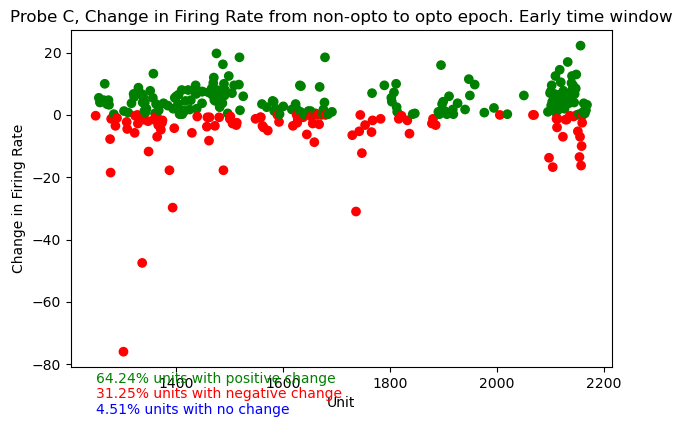

C:\Users\denmanlab\AppData\Local\Temp\ipykernel_22368\318596871.py:1104: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]


[2.75, 9.75, 7.5, 3.0, 12.5, 12.0, 3.75, 5.75, 10.0, 16.5, 3.5, 2.75, 1.75, 2.75, 2.25, 98.0, 3.0, 2.75, 12.75, 0.0, 5.25, 8.5, 7.75, 10.25, 6.25, 2.5, 13.25, 11.5, 12.75, 98.0, 5.25, 12.5, 12.5, 12.5, 1.25, 0.75, 3.0, 3.25, 30.0, 9.0, 5.25, 17.0, 11.25, 7.25, 9.5, 0.0, 11.5, 7.75, 5.0, 16.0, 4.5, 16.5, 8.75, 8.0, 19.0, 31.25, 5.5, 10.0, 8.25, 6.25, 3.25, 6.25, 9.75, 2.5, 4.75, 0.0, 2.75, 0.0, 1.5, 4.5, 2.5, 14.5, 8.75, 0.0, 0.0, 7.25, 3.25, 1.0, 1.0, 0.25, 21.0, 4.0, 8.0, 15.0, 5.5, 1.5, 1.75, 1.75, 1.75, 3.75, 2.75, 2.75, 16.75, 5.25, 11.5, 2.25, 5.25, 6.75, 18.25, 1.0, 7.0, 10.25, 6.5, 4.25, 12.75, 18.0, 3.0, 13.5, 1.25, 11.25, 2.25, 4.25, 2.25, 13.75, 23.5, 1.75, 17.0, 9.0, 4.75, 8.5, 9.0, 3.25, 15.0, 2.0, 8.0, 10.5, 10.5, 4.0, 21.25, 3.75, 14.0, 1.5, 7.0, 1.0, 1.5, 12.25, 2.0, 0.0, 2.25, 6.0, 0.0, 1.5, 0.0, 23.75, 14.75, 29.5, 46.0, 11.25, 16.25, 0.25, 3.0, 0.0, 4.25, 0.0, 2.75, 1.25, 11.75, 0.0, 7.0, 0.0, 0.0, 0.0, 0.0, 1.75, 0.0, 0.0, 0.25, 0.0, 0.0, 3.0, 0.0, 0.25, 0.0, 6.5, 40

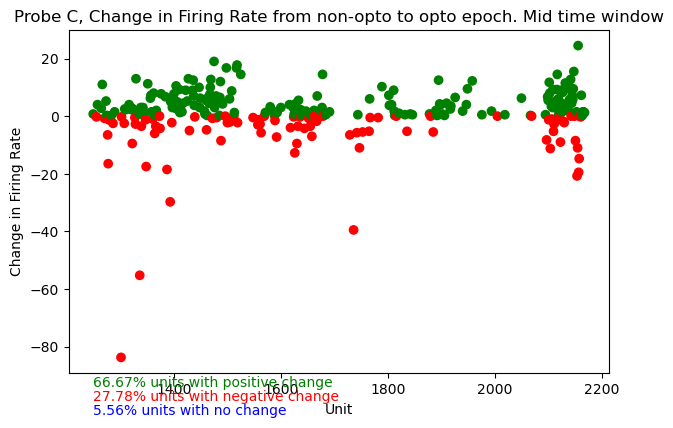

C:\Users\denmanlab\AppData\Local\Temp\ipykernel_22368\318596871.py:1104: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]


[3.5, 10.25, 7.25, 1.5, 12.25, 11.0, 4.0, 4.25, 7.0, 16.5, 4.75, 2.0, 0.75, 2.25, 3.75, 106.75, 2.0, 2.5, 11.5, 0.0, 6.5, 8.25, 8.75, 14.5, 5.75, 2.0, 12.0, 10.25, 11.0, 86.0, 4.0, 9.5, 13.25, 14.75, 1.5, 2.5, 1.25, 2.75, 28.75, 7.0, 5.0, 15.0, 11.25, 8.0, 9.25, 0.0, 10.0, 6.75, 7.25, 13.25, 3.25, 14.0, 11.5, 7.25, 15.0, 28.5, 5.25, 16.0, 7.75, 6.75, 3.0, 6.0, 9.25, 3.5, 4.0, 0.0, 5.5, 1.0, 1.0, 5.0, 6.25, 18.5, 9.75, 0.0, 0.5, 5.25, 3.0, 2.25, 1.25, 0.0, 20.5, 2.75, 7.25, 14.0, 7.25, 2.0, 1.75, 1.75, 1.25, 7.0, 2.25, 2.25, 8.25, 7.75, 16.0, 4.0, 3.0, 4.0, 16.75, 1.5, 6.5, 7.25, 5.25, 3.25, 6.5, 13.5, 1.0, 3.5, 2.5, 21.0, 4.0, 5.25, 2.0, 14.0, 35.0, 4.25, 15.75, 12.75, 7.0, 11.75, 7.0, 3.5, 13.0, 3.75, 10.75, 14.5, 11.25, 3.0, 19.25, 4.0, 10.25, 2.75, 8.25, 0.5, 0.0, 10.75, 3.5, 0.0, 4.0, 9.75, 0.0, 2.0, 0.25, 26.0, 19.0, 33.25, 46.0, 13.0, 16.0, 0.0, 3.0, 0.25, 5.0, 0.0, 2.5, 0.5, 16.0, 0.0, 7.75, 0.0, 0.25, 0.0, 0.0, 1.25, 0.0, 0.5, 0.25, 0.0, 0.0, 1.25, 0.0, 0.5, 0.5, 8.0, 42.5, 5.2

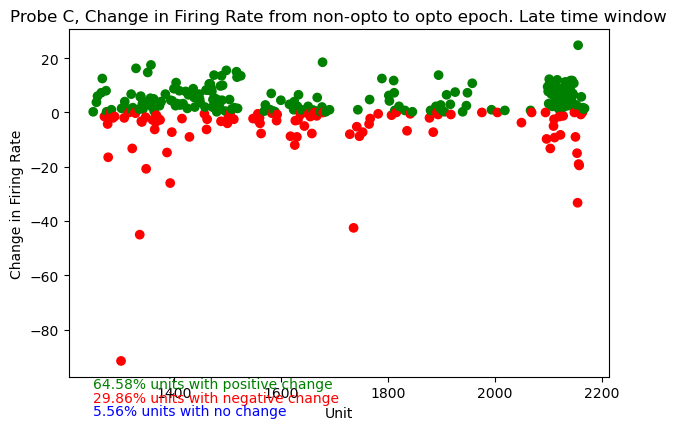

In [654]:

path = r"G:/Grant/rotation/2023-09-29_16-07-39_PaBont2/plots/summary_plots/flash/earlyWindow/probeC/"
fr_early = paBont2.scatter_plot_2("C","LP","Early",path,0,0.04, 0.08,0.005)

path = r"G:/Grant/rotation/2023-09-29_16-07-39_PaBont2/plots/summary_plots/flash/midWindow/probeC/"
fr_mid = paBont2.scatter_plot_2("C","LP",'Mid',path,0,0.04, 0.12,0.005)

path = r"G:/Grant/rotation/2023-09-29_16-07-39_PaBont2/plots/summary_plots//flash/lateWindow/probeC/"
fr_late = paBont2.scatter_plot_2("C","LP",'Late',path,0,0.04, 0.16,0.005)


C:\Users\denmanlab\AppData\Local\Temp\ipykernel_22368\318596871.py:1104: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]


[0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 2.75, 8.5, 1.0, 2.25, 0.0, 0.0, 0.0, 9.0, 0.0, 0.0, 6.0, 3.75, 0.0, 8.0, 39.0, 2.0, 8.5, 3.0, 0.0, 22.0, 1.25, 37.25, 46.75, 3.0, 0.0, 0.75, 1.5, 1.5, 0.75, 8.5, 0.25, 7.75, 2.75, 0.25, 0.5, 3.5, 7.0, 0.75, 34.25, 13.0, 0.75, 3.0, 57.75, 0.5, 1.75, 46.75, 16.5, 67.5, 0.0, 5.0, 19.5, 4.75, 7.0, 1.5, 0.5, 0.0, 1.5, 0.0, 0.0, 0.0, 3.75, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 1.25, 50.0, 15.0, 1.0, 23.0, 1.5, 2.5, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 1.0, 0.0, 3.25, 4.25, 3.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 3.75, 8.75, 10.0, 0.5, 13.5, 146.75, 32.75, 25.5, 14.75, 0.5, 1.0]
[1.25, 0.5, 0.25, 0.0, 0.0, 0.5, 0.25, 2.5, 2.25, 0.75, 0.0, 20.25, 0.25, 3.0, 0.25, 0.5, 2.75, 12.0, 3.75, 9.0, 61.0, 0.0, 1.75, 4.0, 7.75, 31.25, 4.75, 46.75, 57.5, 3.0, 1.25, 2.5, 11.25, 8.5, 0.0, 0.5, 2.5, 2.75, 2.5, 5.25, 14.5, 4.75, 1.75, 0.25, 26.25, 6.5, 0.75, 2.0, 60.25, 0.5, 1.0, 14.0, 4.5, 1.0, 0.25, 5.5, 19.75, 31.75, 3.5, 7.75, 12.5, 8.75, 2.25, 0.25, 0.25, 0.5, 0.0, 0.5, 0.25, 0

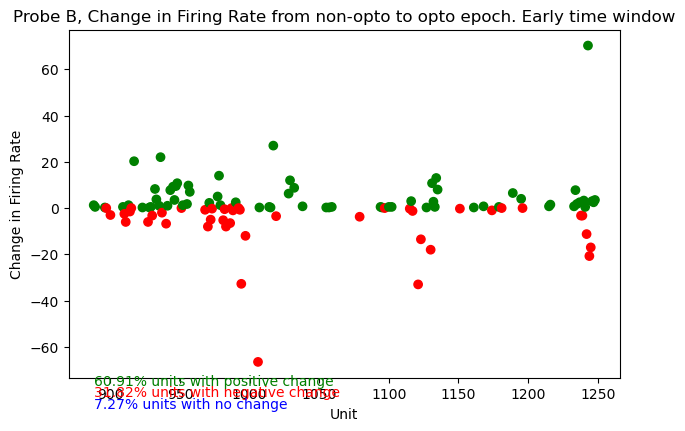

C:\Users\denmanlab\AppData\Local\Temp\ipykernel_22368\318596871.py:1104: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]


[0.0, 0.0, 0.0, 0.0, 3.0, 0.75, 2.25, 9.0, 2.75, 2.75, 0.25, 0.0, 0.0, 10.0, 0.0, 0.0, 6.25, 7.5, 0.0, 8.0, 47.25, 1.0, 8.5, 5.0, 0.0, 25.0, 1.5, 39.75, 59.75, 2.0, 0.0, 1.25, 4.75, 2.25, 0.5, 3.5, 0.0, 7.75, 4.5, 0.75, 1.0, 4.25, 0.5, 0.0, 32.5, 3.0, 0.0, 1.25, 24.75, 0.0, 3.5, 18.0, 17.0, 21.25, 0.0, 3.75, 10.25, 4.25, 2.0, 1.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 4.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 31.0, 6.25, 0.5, 9.25, 0.0, 0.5, 0.0, 0.0, 1.0, 0.5, 0.0, 0.0, 1.25, 0.25, 3.75, 2.25, 2.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.25, 8.0, 11.5, 0.0, 14.0, 88.75, 18.5, 10.25, 5.75, 0.0, 0.25]
[0.75, 1.5, 0.75, 0.0, 0.0, 0.25, 0.25, 3.25, 3.5, 1.0, 0.0, 23.25, 1.0, 3.75, 0.5, 0.25, 2.0, 14.5, 7.5, 10.25, 63.5, 0.0, 1.5, 6.25, 5.25, 30.0, 7.0, 54.0, 63.5, 4.0, 1.75, 3.5, 9.75, 6.75, 0.25, 0.25, 1.5, 1.25, 3.25, 3.25, 14.5, 4.0, 0.5, 0.25, 21.25, 7.0, 0.5, 1.25, 19.75, 1.0, 2.0, 3.75, 5.5, 0.5, 0.0, 2.75, 10.0, 23.25, 2.0, 3.5, 4.5, 4.75, 7.0, 0.5, 0.0, 1.0, 0.25, 1.0, 0.5, 0.0, 0.25, 0.0

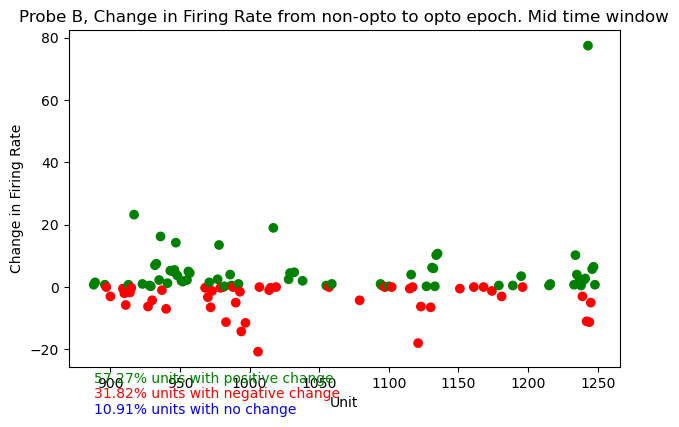

C:\Users\denmanlab\AppData\Local\Temp\ipykernel_22368\318596871.py:1104: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]


[0.0, 0.0, 0.0, 0.0, 3.0, 0.25, 2.0, 6.5, 3.0, 3.5, 0.0, 0.0, 0.0, 11.0, 0.0, 0.0, 9.25, 8.75, 0.0, 10.25, 51.25, 1.0, 9.5, 4.75, 0.0, 25.75, 0.0, 36.75, 66.5, 2.0, 0.0, 2.0, 3.75, 4.5, 0.0, 6.25, 0.0, 6.25, 5.0, 0.5, 0.0, 1.0, 0.25, 0.0, 50.0, 14.25, 0.0, 0.25, 24.75, 2.5, 13.25, 7.5, 18.75, 28.75, 0.0, 1.25, 12.0, 2.5, 1.75, 0.75, 0.25, 0.0, 6.25, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.25, 5.75, 0.0, 5.0, 0.25, 1.75, 0.0, 0.0, 1.0, 0.5, 0.0, 0.0, 2.75, 0.25, 1.75, 0.25, 2.75, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 1.5, 0.25, 5.75, 7.5, 0.5, 16.75, 55.0, 15.0, 8.25, 5.25, 0.0, 0.25]
[0.75, 0.75, 0.25, 0.75, 0.0, 0.75, 0.0, 2.75, 3.25, 0.75, 0.0, 26.75, 1.0, 8.75, 0.5, 0.25, 2.25, 18.25, 5.75, 6.25, 70.0, 0.0, 0.25, 10.25, 4.75, 29.75, 8.0, 46.25, 69.75, 3.0, 2.5, 3.0, 18.0, 9.75, 0.0, 0.5, 0.75, 1.75, 3.0, 3.0, 1.5, 4.0, 0.0, 0.0, 17.25, 12.0, 1.0, 2.0, 15.5, 0.75, 2.75, 2.75, 5.0, 0.5, 0.25, 0.75, 9.5, 13.75, 0.75, 2.5, 4.5, 3.25, 4.25, 0.25, 0.25, 2.0, 0.25, 1.5, 0.5,

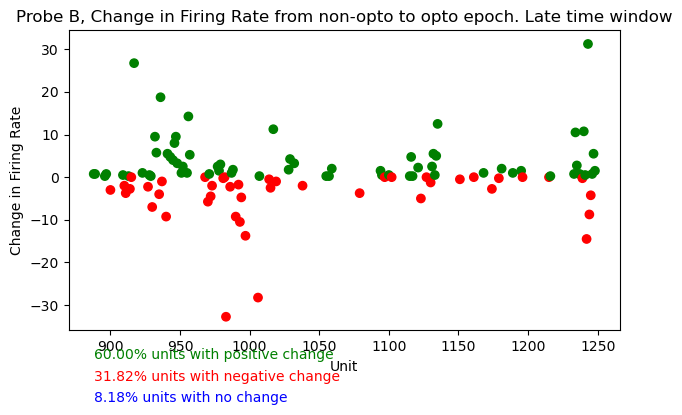

In [653]:

path = r"G:/Grant/rotation/2023-09-29_16-07-39_PaBont2/plots/summary_plots/earlyWindow/probeB/"
fr_early = paBont2.scatter_plot_2("B","LM","Early",path,0,0.04, 0.08,0.005)

path = r"G:/Grant/rotation/2023-09-29_16-07-39_PaBont2/plots/summary_plots/midWindow/probeB/"
fr_mid = paBont2.scatter_plot_2("B","LM",'Mid',path,0,0.04, 0.12,0.005)

path = r"G:/Grant/rotation/2023-09-29_16-07-39_PaBont2/plots/summary_plots/lateWindow/probeB/"
fr_late = paBont2.scatter_plot_2("B","LM",'Late',path,0,0.04, 0.16,0.005)


C:\Users\denmanlab\AppData\Local\Temp\ipykernel_22368\2266038690.py:1104: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]


[0.25, 0.0, 0.75, 2.0, 5.5, 1.0, 29.75, 0.5, 15.0, 10.25, 2.5, 42.5, 12.25, 0.0, 47.0, 66.25, 125.75, 18.5, 5.5, 6.0, 17.0, 7.75, 81.25, 15.5, 0.0, 5.5, 2.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.75, 0.0, 3.0, 21.25, 12.0, 5.5, 48.5, 10.75, 0.25, 0.75, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.25, 0.25, 0.25, 0.0, 7.5, 0.25, 0.0, 1.75, 0.0, 6.25, 20.0, 3.0, 14.5, 114.0, 9.25, 38.5, 11.75, 0.0, 25.25, 22.75, 12.5, 0.5, 3.25, 1.75, 6.75, 0.0, 60.0, 0.0, 0.0, 2.0]
[0.25, 0.0, 6.5, 10.0, 0.0, 0.0, 15.0, 2.0, 10.5, 12.25, 6.75, 14.0, 17.5, 0.5, 25.25, 25.75, 112.75, 16.5, 7.0, 15.5, 15.0, 17.0, 59.75, 12.5, 3.75, 1.0, 2.0, 6.0, 19.5, 0.0, 12.5, 0.75, 13.0, 0.5, 1.5, 0.25, 0.5, 6.75, 30.5, 24.75, 4.25, 2.25, 3.0, 16.25, 15.0, 0.25, 9.75, 0.5, 0.25, 2.0, 2.25, 0.75, 0.5, 26.75, 0.25, 0.25, 0.0, 0.75, 9.5, 0.75, 0.5, 3.75, 3.0, 1.25, 0.75, 22.0, 122.0, 1.25, 7.5, 15.75, 3.75, 6.0, 4.25, 7.75, 1.75, 3.75, 6.0, 2.75, 15.75, 38.0, 12.5, 15.5, 2.75]
83
83
83


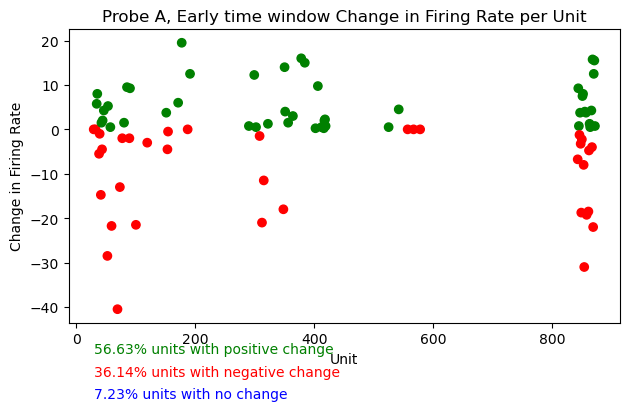

C:\Users\denmanlab\AppData\Local\Temp\ipykernel_22368\2266038690.py:1104: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]


[0.5, 0.0, 0.0, 0.0, 4.0, 0.75, 15.0, 0.0, 19.5, 17.25, 0.0, 28.75, 4.75, 0.0, 16.25, 24.25, 49.75, 7.5, 3.5, 2.25, 7.0, 12.0, 39.0, 2.75, 0.0, 1.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.5, 7.75, 4.25, 6.25, 20.5, 2.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.25, 0.25, 0.0, 0.0, 7.75, 0.5, 0.0, 0.5, 0.0, 0.75, 9.0, 1.0, 5.25, 40.25, 3.25, 13.75, 10.0, 0.25, 9.5, 10.0, 0.75, 0.0, 0.25, 0.25, 2.75, 0.0, 39.0, 0.25, 0.0, 0.0]
[1.0, 0.0, 6.0, 4.0, 0.0, 0.0, 6.75, 1.25, 5.0, 19.5, 0.75, 13.25, 5.25, 0.25, 9.75, 12.0, 52.0, 6.0, 3.5, 7.0, 7.5, 20.75, 27.5, 3.5, 1.0, 0.0, 0.75, 0.5, 3.0, 0.0, 2.25, 0.25, 6.25, 0.75, 0.75, 0.25, 0.5, 6.25, 18.75, 4.75, 0.75, 0.75, 0.75, 3.25, 2.75, 0.25, 0.75, 0.25, 0.25, 1.0, 1.75, 0.25, 0.25, 10.75, 1.0, 0.25, 0.0, 0.75, 3.5, 0.0, 0.0, 3.75, 6.0, 1.0, 0.25, 11.25, 40.75, 0.5, 5.25, 18.25, 3.5, 0.75, 1.0, 2.0, 1.25, 1.5, 1.0, 0.25, 8.75, 23.25, 8.75, 2.75, 1.0]
83
83
83


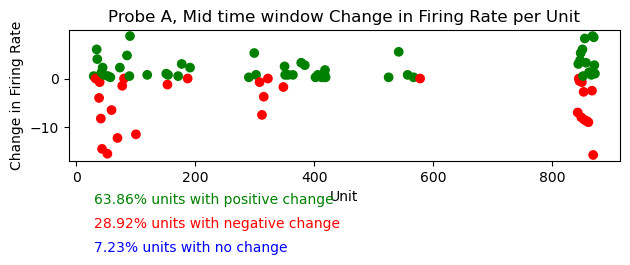

C:\Users\denmanlab\AppData\Local\Temp\ipykernel_22368\2266038690.py:1104: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]


[0.0, 0.0, 0.75, 0.25, 2.5, 0.0, 16.5, 0.25, 7.0, 30.0, 0.0, 32.25, 0.0, 0.0, 14.75, 15.0, 21.75, 4.75, 4.25, 1.75, 3.0, 13.5, 14.0, 2.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 10.25, 1.75, 7.25, 10.75, 2.25, 0.0, 0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.75, 0.0, 0.0, 0.0, 4.0, 0.5, 0.0, 1.0, 0.0, 1.25, 5.5, 0.0, 4.75, 10.5, 0.5, 2.5, 16.25, 0.25, 0.5, 2.0, 2.25, 0.0, 0.75, 0.0, 0.0, 0.0, 11.75, 0.0, 0.0, 0.0]
[0.25, 0.0, 7.75, 5.0, 0.0, 0.5, 7.75, 0.5, 5.25, 33.5, 0.75, 18.75, 0.0, 0.5, 7.25, 12.75, 44.0, 7.5, 4.5, 6.5, 7.0, 22.5, 15.75, 6.5, 1.25, 0.25, 1.5, 0.0, 5.25, 0.0, 1.5, 0.0, 7.5, 1.5, 0.5, 0.0, 0.5, 7.0, 12.5, 11.25, 2.5, 1.25, 0.5, 6.5, 2.75, 0.5, 1.5, 0.25, 0.25, 1.5, 3.0, 0.0, 0.0, 14.0, 0.0, 0.0, 0.0, 0.0, 3.25, 0.0, 3.0, 2.25, 4.5, 0.5, 0.0, 1.75, 30.75, 1.5, 2.5, 14.25, 4.5, 0.0, 1.0, 3.5, 0.25, 2.25, 0.5, 0.0, 0.75, 11.75, 9.5, 1.5, 1.0]
83
83
83


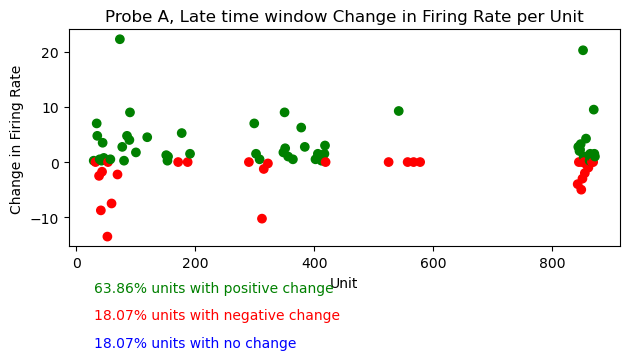

In [645]:

path = r"G:/Grant/rotation/2023-09-29_16-07-39_PaBont2/plots/summary_plots/earlyWindow/probeA/"
fr_early = paBont2.scatter_plot_2("A","V1","Early",path,0,0.04, 0.08,0.005)

path = r"G:/Grant/rotation/2023-09-29_16-07-39_PaBont2/plots/summary_plots/midWindow/probeA/"
fr_mid = paBont2.scatter_plot_2("A","V1",'Mid',path,0,0.04, 0.12,0.005)

path = r"G:/Grant/rotation/2023-09-29_16-07-39_PaBont2/plots/summary_plots/lateWindow/probeA/"
fr_late = paBont2.scatter_plot_2("A","V1",'Late',path,0,0.04, 0.16,0.005)


In [605]:
print(fr_early)


None


In [562]:
# # def allUnits_early_window_matrix(self, probeLetter, pre, post,shift_trigger_start_time,bin_size):
# path = r"G:/Grant/rotation/2023-09-29_16-07-39_PaBont2/plots/earlyWindow/probeA/"
# # fr = paBont2.allUnits_combined_matrix("A","v1",path,0,0.04, 0.08,0.005)
# # fr = paBont2.allUnits_early_window_matrix("A","v1",path,0,0.04, 0.08,0.005)
# fr = paBont2.scatter_plot("A","v1",path,0,0.04, 0.08,0.005)



In [449]:
print(fr[0:20])

    unit  avg_firing_rate_non_opto  avg_firing_rate_opto  changeFR
0     29                      0.25                  0.25      0.00
1     32                      0.00                  0.00      0.00
2     34                      0.75                  6.50      5.75
3     35                      2.00                 10.00      8.00
4     38                      5.50                  0.00     -5.50
5     39                      1.00                  0.00     -1.00
6     41                     29.75                 15.00    -14.75
7     42                      0.50                  2.00      1.50
8     43                     15.00                 10.50     -4.50
9     44                     10.25                 12.25      2.00
10    46                      2.50                  6.75      4.25
11    52                     42.50                 14.00    -28.50
12    53                     12.25                 17.50      5.25
13    57                      0.00                  0.50      

In [310]:
# Define the time window (in seconds)
time_window = 0.04  # Replace with the actual time window

# Initialize an empty list to store the average firing rates for each unit
avg_firing_rates = []

# Loop through each unit's firing rates
for firing_rates in fr:
    # Calculate the average firing rate for this unit
    avg_firing_rate = np.mean(firing_rates[0:8])
    # Append the average firing rate to the list
    avg_firing_rates.append(avg_firing_rate)

# Now avg_firing_rates contains the average firing rate for each unit
print("Average firing rates:", avg_firing_rates)


Average firing rates: [0.25, 0.0, 0.0, 0.0, 3.25, 0.0, 13.75, 0.0, 4.0, 11.75, 0.0, 23.25, 0.0, 0.0, 7.0, 35.0, 30.75, 8.5, 7.75, 2.0, 6.25, 9.25, 29.0, 11.0, 0.0, 2.0, 1.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.75, 9.25, 4.0, 8.75, 18.25, 3.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.75, 0.25, 1.25, 0.0, 1.25, 0.5, 0.0, 0.5, 0.0, 1.25, 10.25, 0.25, 5.25, 0.5, 1.0, 8.75, 20.0, 2.0, 0.75, 9.0, 10.0, 0.25, 0.25, 1.5, 0.5, 0.0, 26.5, 0.0, 0.0, 1.75]


In [311]:
print(avg_firing_rates[14])
print(fr[14])

7.0
[ 8.  4.  4.  2.  2.  4.  6. 26. 32. 40. 40. 40. 58. 52. 38. 40. 44. 54.
 26. 22. 24. 14. 14. 12. 12. 10.  8. 14. 12. 12.  8. 10. 14. 14. 20. 12.
 24. 12. 10. 16.  4. 14.  8. 20.  6. 16.  8. 10. 12. 16. 16. 12. 20. 20.
  2. 10. 10. 24. 10. 12.  6. 10.  4.  0.  2.  2.  2.  4.  6.  2.  0.  0.
  4.  4.  2.  0.  0.  2.  0.  2.  0.  0.  6.  0.  4.  8. 10.  6.  4.  8.
  6. 12.  4. 10. 14.  8. 24. 10. 14.  6. 12.  8.  0.  4.  0.  4.  2.  4.
  4.  2.  0.  0.  2.  4.  0.  2.  0.  0.  0.  2.  0.  0.  2.  0.  2.  8.
  4.  6.  6.  6.  0.  4.  8.  6.  6.  2.  4.  6. 10. 10. 12.  4.  6.  2.
  4.  6.  6.  2.  0.  0.  2.  0.  0.  2.  6.  8.  2.  6.  0.  2.  4.  0.
  8.  2.  2.  2.  0.  0.  2.  4.  2.  4.  2.  0.  2.  0.  2.  4.  2.  4.
  2.  6.  4.  0.  4.  2.  4.  4.  2.  0.  6.  6.  0.  0.  0.  0.  0.  0.
  0.  0.]


In [203]:
# path = r"G:/Grant/rotation/2023-09-29_16-07-39_PaBont2/plots/earlyWindow/probeA/"
# #def allUnits_ealy_window_flash(self, probeLetter, brain_region,shift_trigger_start_time,pre, post,path ,Savefig=False):

# fr = paBont2.allUnits_ealy_window_flash("A","V1", 0.08, -0.5, 1.5, path,True)

In [73]:
print(fr) 

None


In [4]:
# path = r"G:/Grant/rotation/2023-09-20_14-25-05_eOPN3_33/fr_df/probeA/"
# eOPN3_3.allUnits_full_recording_fr_df("A","LP", path,True,)

In [1213]:
# path = r"G:/Grant/rotation/2023-09-29_16-07-39_PaBont2/plots/earlyWindow/probeA/"
spikes = paBont2.allUnits_early_window_matrix("A","V1", 0.19, path,True)
# spike_opto = paBont2.allUnits_early_window_opto_matrix("A","V1", path,True)



C:\Users\denmanlab\AppData\Local\Temp\ipykernel_5768\2021823416.py:1102: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]


UnboundLocalError: cannot access local variable 'samplingRate' where it is not associated with a value

In [1178]:
print(len(spikes)) #number of units
print(len(spikes[0]))
print(len(spikes[0][0])) #edge
print(len(spikes[0][1])) #hist
print(len(spikes[0][2])) # variance
print(spikes[9][1]) # first hist

first_fr = []
for i in range(len(spikes)):
    sum = np.sum(spikes[i][1])
    first_fr.append(sum / len(spikes[i][1]))

print(first_fr[9])



83
3
20
20
20
[37.4  9.2 14.6  8.8 10.2  6.2  7.6  8.8  3.6  9.4  7.6  5.4  3.8  3.6
  6.   8.2  8.6  8.2  5.   0. ]
8.609999999999998


In [1155]:
# print(len(spike_opto)) #number of units
# print(len(spike_opto[0]))
# print(len(spike_opto[0][0])) #edge
# print(len(spike_opto[0][1])) #hist
# print(len(spike_opto[0][2])) # variance
# print(spike_opto[0][0]) #edge
# print(spike_opto[0][1]) #hist
# print(spike_opto[0][2]) # variance

# first_fr = []
# for i in range(len(spike_opto)):
#     sum = np.sum(spike_opto[i][1])
#     first_fr.append(sum / len(spike_opto[i][1]))

# print(first_fr)



83
3
21
21
21
26.076190476190472


In [ ]:
path = r"G:/Grant/rotation/2023-09-29_16-07-39_PaBont2/fr_df/probeA/"
paBont2.allUnits_full_recording_fr_df("A","V1", path,True,)

C:\Users\denmanlab\AppData\Local\Temp\ipykernel_5768\1709294157.py:794: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]


['luminance_flash', 'spatioluminance_noise', 'gratings', 'scenes', 'luminance_flash_opto', 'spatioluminance_noise_opto', 'gratings_opto', 'scenes_opto']


KeyboardInterrupt: 

In [424]:
path = r"G:/Grant/rotation/2023-09-20_14-25-05_eOPN3_33/plots/fullRecording/probeC/"
eOPN3_3.allUnits_full_recording_psthLined("C","LP", path,True,)

['luminance_flash', 'spatioluminance_noise', 'gratings', 'scenes', 'luminance_flash_opto', 'spatioluminance_noise_opto', 'gratings_opto', 'scenes_opto']
Empty DataFrame
Columns: [luminance_flash, spatioluminance_noise, gratings, scenes, luminance_flash_opto, spatioluminance_noise_opto, gratings_opto, scenes_opto]
Index: []


C:\Users\denmanlab\AppData\Local\Temp\ipykernel_5768\1875542412.py:774: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]


In [398]:
path = r"G:/Grant/rotation/2023-09-29_16-07-39_PaBont2/plots/fullRecording/probeC/"
paBont2.allUnits_full_recording_psthLined("C","LP", path,True,)

C:\Users\denmanlab\AppData\Local\Temp\ipykernel_5768\646413154.py:775: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]


1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


C:\Users\denmanlab\AppData\Local\Temp\ipykernel_5768\2098616003.py:672: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]


UFuncTypeError: Cannot cast ufunc 'divide' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

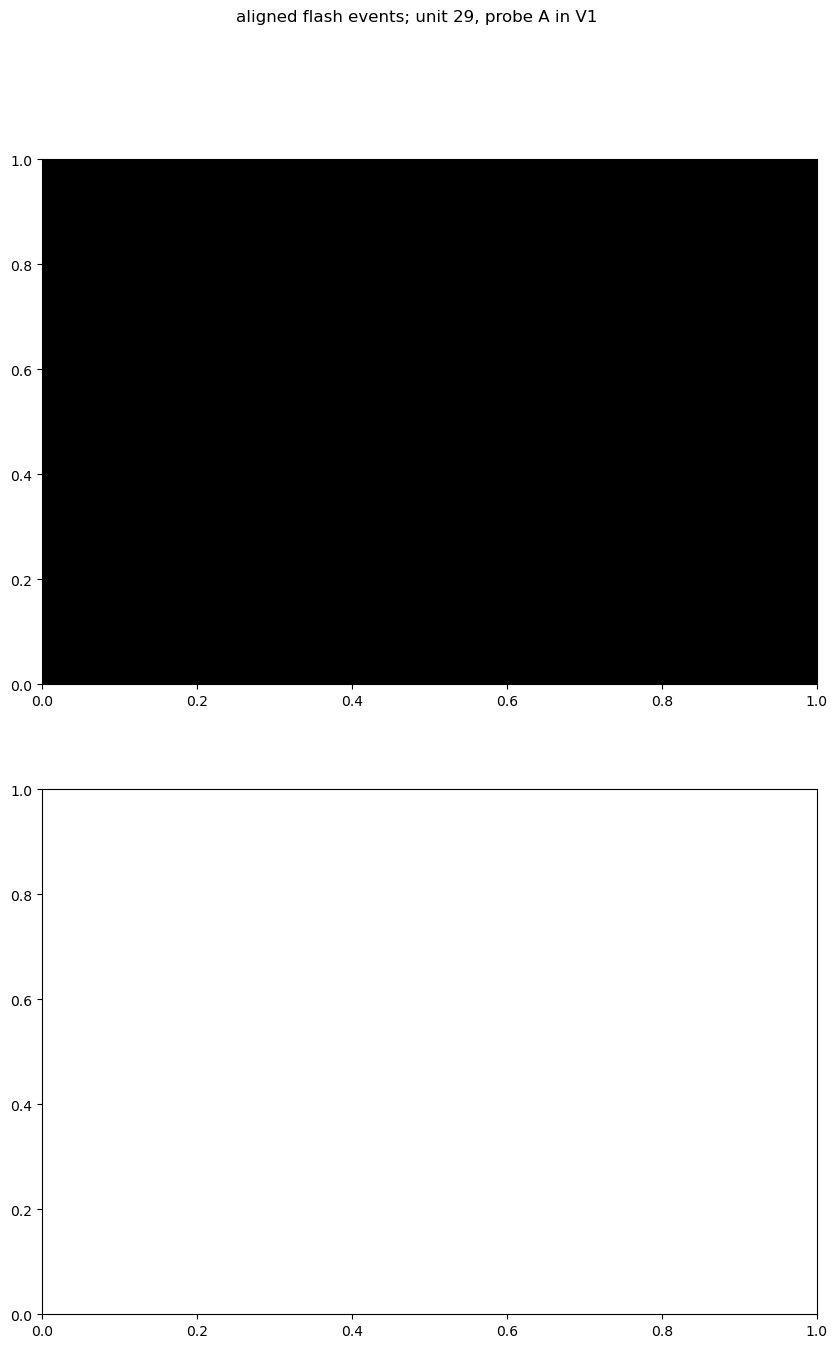

In [ ]:
path = r"G:/Grant/rotation/2023-09-29_16-07-39_PaBont2/plots/flashes/psth/probeA/"
paBont2.psth("A","V1", path,True,)

In [167]:
path = r"G:/Grant/rotation/2023-09-29_16-07-39_PaBont2/plots/flashes/epoch/probeB/"
eOPN3_3.allUnits_flash_epoch_psthLined("B","LM", path,True,)

path = r"G:/Grant/rotation/2023-09-29_16-07-39_PaBont2/plots/gratings/epoch/probeB/"
eOPN3_3.allUnits_grating_epoch_psthLined("B","LM", path,True,)

path = r"G:/Grant/rotation/2023-09-29_16-07-39_PaBont2/plots/scenes/epoch/probeB/"
eOPN3_3.allUnits_scene_epoch_psthLined("B","LM", path,True,)

C:\Users\denmanlab\AppData\Local\Temp\ipykernel_5768\511093363.py:245: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]


Skipping unit 896 for epoch luminance_flash due to insufficient spike times.
Skipping unit 929 for epoch luminance_flash due to insufficient spike times.
Skipping unit 1102 for epoch luminance_flash due to insufficient spike times.
Skipping unit 1133 for epoch luminance_flash due to insufficient spike times.


C:\Users\denmanlab\AppData\Local\Temp\ipykernel_5768\511093363.py:419: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
C:\Users\denmanlab\AppData\Local\Temp\ipykernel_5768\511093363.py:622: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]


In [65]:
# df_event_spikes = paBont2.extract_spike_times_in_event_windows_flash('A')
# Set the first row as the index

# spike_count=[]
# for i in range(83):
#     unit_count = []
#     for r in range(199):
#         count = len(df_event_spikes.iloc[i,r])
#         unit_count.append(count)
#     spike_count.append(unit_count)
     
# sum_count = []
# for i in range(83):
#     sum_count.append(sum(spike_count[i]))
    

# print(sum_count)


# nwb dataframes

In [355]:
trials = paBont2.trials()
#show rows with specific stimulus
print(trials[trials.stimulus == 'luminance_flash_opto'])

      start_time    stop_time              stimulus  optogenetics_LED_state  \
id                                                                            
100  6820.320900  6823.323697  luminance_flash_opto                       1   
101  6823.319867  6826.322664  luminance_flash_opto                       1   
102  6826.323067  6829.325864  luminance_flash_opto                       1   
103  6829.325733  6832.328530  luminance_flash_opto                       1   
104  6832.328967  6835.331764  luminance_flash_opto                       1   
..           ...          ...                   ...                     ...   
195  7105.586500  7108.589297  luminance_flash_opto                       1   
196  7108.589967  7111.592764  luminance_flash_opto                       1   
197  7111.593667  7114.596464  luminance_flash_opto                       1   
198  7114.594600  7117.597397  luminance_flash_opto                       1   
199  7117.597800  7120.600597  luminance_flash_opto 

In [337]:
df = paBont2.units()
df.spike_times[100:130]

id
100    [3386.118867516285, 3386.1482635023813, 3386.1...
101    [3386.780060320564, 3398.0865707202656, 3407.5...
102    [4962.109387227364, 5138.85633934014, 5140.430...
103    [4710.008549543235, 4732.664006027476, 4780.96...
104    [5136.481571984543, 5272.614226729516, 6276.43...
105    [5238.059318539055, 6024.4875065179085, 6025.3...
106    [3467.4390759533553, 3497.544430613392, 3555.7...
107    [3424.3987581103784, 3464.7691385396283, 4658....
108    [3428.452490895859, 3444.6698235916438, 3449.8...
109    [3440.227592639817, 3448.458878516852, 3473.10...
110    [3386.740253951204, 3387.4026017749184, 3388.4...
111    [3386.2500984054404, 3386.2703185729333, 3386....
112    [3386.1645130429456, 3386.748362038169, 3386.7...
113    [3399.674342356746, 3453.2943261960427, 3598.6...
114    [3685.2481511507526, 4387.579053065945, 4812.9...
115    [3387.527292815967, 3389.899484257692, 3390.03...
116    [3395.714359094803, 3402.647753358156, 3402.93...
117    [3389.1459327176485, 

In [333]:
paBont2.epochs()

,start_time,stop_time,tags
id,,,
0,3570.826467,3871.097233,[luminance_flash]
1,3877.891667,4481.407900,[spatioluminance_noise]
2,4486.933367,5769.590833,[gratings]
3,5782.689433,6785.631842,[scenes]
4,6820.320900,7120.597800,[luminance_flash_opto]
5,7120.976300,7761.235467,[spatioluminance_noise_opto]
6,7796.989433,9079.630758,[gratings_opto]
7,9123.057627,10126.000259,[scenes_opto]


In [72]:
eOPN3_3.optogenetics_states()

,start_time,stop_time,power,wavelength
id,,,,
0,1490.215667,1490.215800,1.5,565
1,2242.410121,2242.410154,1.5,565
2,2273.195900,2480.630900,1.5,565
3,5492.796458,5493.797100,1.5,565
4,5494.798233,5495.804567,1.5,565
...,...,...,...,...
104,11055.113233,11056.120567,1.5,565
105,11057.128447,11058.142333,1.5,565
106,11059.143300,11060.160033,1.5,565
